# **Question 1**

In [1]:
#imports and downloads required in this project
from sklearn.datasets import fetch_20newsgroups
import nltk
nltk.download('stopwords' )
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
import numpy as np
from sklearn import metrics
from sklearn.feature_extraction import text
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
!pip install umap-learn
!pip install umap-learn[plot]
import umap
import umap.plot
import umap.umap_ as umap_
from sklearn.cluster import AgglomerativeClustering
!pip install hdbscan
import hdbscan
import pandas as pd
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=9fadfa2ec367e11c3e3b67023fc864b173268a22f5f5a294146e904424ca1f69
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 40.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039297 sha256=8e286a5c221626c5e8eef421bf12cfbe33df7de33c6ad1434ac526f5e75b4d01
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


In [ ]:
#Specifying the required categories and fetching the entire dataset while removing headers and footers
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers'), categories = categories,random_state=0)

In [ ]:
#Used to see first five entries of data in the dataset
newsgroups.data[0:5]

['In article <mssC5y5u0.4Dn@netcom.com> mss@netcom.com (Mark Singer) writes:\n>\n>Actually, I think the large-scale sample size is part of the problem.\n>It seems to me that if we were to plot all the players in baseball\n>in regard to BA vs. Clutch BA deviation we would get some kind of\n>bell curve.  (The X-axis being the +/- deviation in clutch hitting\n>vs. non-clutch;  the Y-axis being the number of players.)  Certainly\n>there would be *some* players on the extreme ends of the bell.\n\nRight.  Most definitely.\n\n>My *supposition* is that if we were to find the SAME players\n>consistently (year after year) at one end of the bell or the other,\n>then we might be able to make some reasonable conclusions about\n>*those* players (as opposed to all baseball players).\n\nThis may be the root of the confusion...\n\nPlease consider the following hypothetical with an open mind.  Note\nthat I am *not* (yet) saying that it has anything to do with the\nquestion at hand.\n\nSuppose we have a 

In [ ]:
#These depict the categories
print(newsgroups.target)

[6 4 1 ... 0 4 6]


In [ ]:
#Checking which number in target corresponds to which target name
i, id = np.unique(newsgroups.target, return_index=True)
for i in range(len(id)):
    print(newsgroups.target_names[i],' corresponds to index = ', newsgroups.target[id[i]])

comp.graphics  corresponds to index =  0
comp.os.ms-windows.misc  corresponds to index =  1
comp.sys.ibm.pc.hardware  corresponds to index =  2
comp.sys.mac.hardware  corresponds to index =  3
rec.autos  corresponds to index =  4
rec.motorcycles  corresponds to index =  5
rec.sport.baseball  corresponds to index =  6
rec.sport.hockey  corresponds to index =  7


In [ ]:
#Making a sparse TF-IDF matrix using TF-IDF vectorizer with min_df=3 and removing stopwords
vectorizer = TfidfVectorizer(min_df=3,stop_words="english")
X_tfidf = vectorizer.fit_transform(newsgroups.data)
X_tfidf.shape

(7882, 23522)

QUESTION 1: Report the dimensions of the TF-IDF matrix you obtain.

> The dimensions of the TF-IDF matrix is (7882, 23522)

# **Question 2**

In [ ]:
#Performing kmeans using the conditions specified in the question
kmeans = KMeans(n_clusters=2,max_iter=1000,n_init=30, random_state=0)
kmeans.fit(X_tfidf)

KMeans(max_iter=1000, n_clusters=2, n_init=30, random_state=0)

In [ ]:
#The clusters to which each datapoint is assigned
kmeans.labels_

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

In [ ]:
#Mapping the categories to 0 and 1. 0 corresponds to Class 1 i.e the comp category. 1 corresponds to Class 2 i.e the rec category
labels = np.full_like(newsgroups.target, 0)
for y in [0,1,2,3]:
    labels[np.argwhere(newsgroups.target == y)] = 0

for y in [4,5,6,7]:
    labels[np.argwhere(newsgroups.target == y)] = 1.
#Checking how many non zero labels are there and how the data is distributed
print(np.count_nonzero(labels))
#Checking how many zero labels are there
print(np.count_nonzero(labels==0))

3979
3903


In [ ]:
#Contingency table of the clustering result
contingencyMatrix = metrics.cluster.contingency_matrix(labels, kmeans.labels_)
print(contingencyMatrix)

[[ 784 3119]
 [3922   57]]


In [ ]:
#Function to plot the contingency matrix
def plot_mat(mat, xticklabels = None, yticklabels = None, pic_fname = None, size=(-1,-1), if_show_values = True,
             colorbar = True, grid = 'k', xlabel = None, ylabel = None, title = None, vmin=None, vmax=None):
    if size == (-1, -1):
        size = (mat.shape[1] / 3, mat.shape[0] / 3)
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1,1,1)
    # im = ax.imshow(mat, cmap=plt.cm.Blues)
    im = ax.pcolor(mat, cmap=plt.cm.Blues, linestyle='-', linewidth=0.5, edgecolor=grid, vmin=vmin, vmax=vmax)

    if colorbar:
        plt.colorbar(im,fraction=0.046, pad=0.06)
    # tick_marks = np.arange(len(classes))
    # Ticks
    lda_num_topics = mat.shape[0]
    nmf_num_topics = mat.shape[1]
    yticks = np.arange(lda_num_topics)
    xticks = np.arange(nmf_num_topics)
    ax.set_xticks(xticks + 0.5)
    ax.set_yticks(yticks + 0.5)
    if xticklabels is None:
        xticklabels = [str(i) for i in xticks]
    if yticklabels is None:
        yticklabels = [str(i) for i in yticks]
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    # Minor ticks
    # ax.set_xticks(xticks, minor=True);
    # ax.set_yticks(yticks, minor=True);
    # ax.set_xticklabels([], minor=True)
    # ax.set_yticklabels([], minor=True)
    # ax.grid(which='minor', color='k', linestyle='-', linewidth=0.5)
    # tick labels on all four sides
    ax.tick_params(labelright = True, labeltop = False)
    if ylabel:
        plt.ylabel(ylabel, fontsize=15)
    if xlabel:
        plt.xlabel(xlabel, fontsize=15)
    if title:
        plt.title(title, fontsize=15)
    # im = ax.imshow(mat, interpolation='nearest', cmap=plt.cm.Blues)
    ax.invert_yaxis()
    # thresh = mat.max() / 2
    def show_values(pc, fmt="%.0f", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in itertools.zip_longest(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.5):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw,fontsize=10)
    if if_show_values:
        show_values(im)
    # for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
    #     ax.text(j, i, "{:.2f}".format(mat[i, j]), fontsize = 4,
    #              horizontalalignment="center",
    #              color="white" if mat[i, j] > thresh else "black")
    plt.tight_layout()
    if pic_fname:
        plt.savefig(pic_fname, dpi=300, transparent=True)
    plt.show()
    plt.close()

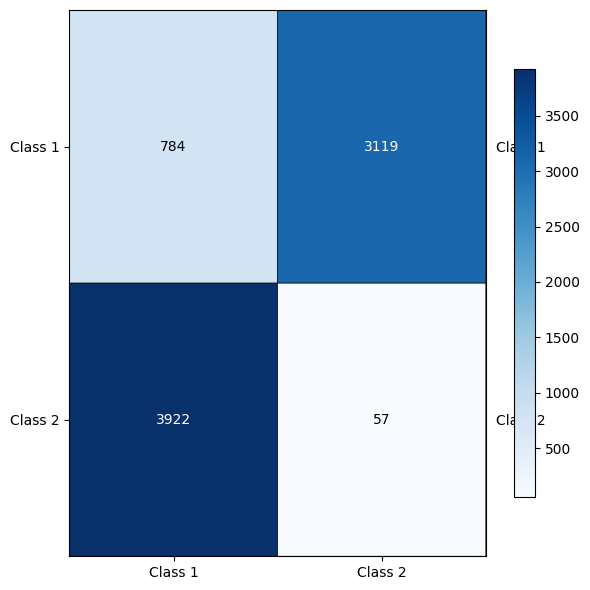

In [ ]:
#Plotting the contingency matrix
plot_mat(contingencyMatrix,size=(6,6),xticklabels = ['Class 1','Class 2'],yticklabels = ['Class 1','Class 2'],pic_fname = 'Q2.png')

QUESTION 2: Report the contingency table of your clustering result. You may use the provided plotmat.py to visualize the matrix. Does the contingency matrix have to be square-shaped?

> The contingency table of the clustering result is as found above along with the plot to visualize the matrix. Generally the contingency matrix is square-shaped because the number of clusters is equivalent to the number of labels we have divided the categories into. But, there is a possibility that there is a category in the data which does not have any mapped label or vice versa. In that case, we may not get a square shaped matrix. This is a rare case but it is possible.

# **Question 3**

In [ ]:
#Reporting the 5 clustering measures
print("Homogeneity: %f" % homogeneity_score(labels, kmeans.labels_))
print("Completeness: %f" % completeness_score(labels, kmeans.labels_))
print("V-measure: %f" % v_measure_score(labels, kmeans.labels_))
print("Adjusted Rand-Index: %f"% adjusted_rand_score(labels, kmeans.labels_))
print("Adjusted Mutual Information Score: %f"% adjusted_mutual_info_score(labels, kmeans.labels_))

Homogeneity: 0.559685
Completeness: 0.575387
V-measure: 0.567427
Adjusted Rand-Index: 0.618695
Adjusted Mutual Information Score: 0.567387


QUESTION 3: Report the 5 clustering measures explained in the introduction for K- means clustering.

> Below are the 5 clustering measures:

>>Homogeneity: 0.559685\
Completeness: 0.575387\
V-measure: 0.567427\
Adjusted Rand-Index: 0.618695\
Adjusted Mutual Information Score: 0.567387

# **Question 4**

In [ ]:
#Using the truncated SVD representation
svd = TruncatedSVD(n_components=1000, n_iter=7, random_state=0)
svd.fit(X_tfidf)
print(svd.explained_variance_ratio_)

[0.00201436 0.00611917 0.00415898 0.00370999 0.00315209 0.00289054
 0.00271394 0.00243604 0.00236185 0.00224804 0.00219287 0.00212684
 0.00205599 0.0019882  0.00193046 0.00190107 0.00184443 0.00179087
 0.00169332 0.00167915 0.00162881 0.00158195 0.00156594 0.00155107
 0.00150867 0.00149229 0.00146625 0.00142966 0.00141217 0.00140024
 0.00139805 0.00136223 0.00134953 0.00134541 0.00133791 0.00132739
 0.00130675 0.00129956 0.00128765 0.00127833 0.00127019 0.00125979
 0.00124874 0.00124307 0.00123234 0.00122056 0.00121077 0.0011966
 0.00118996 0.00117484 0.00117191 0.00116812 0.00115711 0.00115457
 0.00114906 0.00113694 0.00113275 0.00112897 0.00112603 0.00111891
 0.00111714 0.00110745 0.00109919 0.00109283 0.00108208 0.00107766
 0.00107558 0.00107021 0.00106491 0.00106382 0.00105472 0.00104956
 0.00104457 0.00103589 0.00103149 0.00102601 0.00102179 0.00102084
 0.00101089 0.00100842 0.00100721 0.00100361 0.00099713 0.00099345
 0.00098569 0.00098123 0.00097783 0.00097607 0.00097017 0.00096

In [ ]:
#Checking the singular values
print(svd.singular_values_)

[10.81781675  6.90493922  5.67909457  5.3686817   4.94533818  4.73846943
  4.58944552  4.34560159  4.27912051  4.1757771   4.12485569  4.06298008
  3.99847435  3.92599109  3.8687667   3.839761    3.78186689  3.72705217
  3.62302022  3.6089317   3.55383843  3.50184973  3.48437584  3.46751419
  3.41977456  3.40116259  3.37148485  3.32905228  3.31076055  3.29462144
  3.29240032  3.24960847  3.23438588  3.23034812  3.22231597  3.20804465
  3.18270886  3.17438589  3.16175085  3.14792144  3.13788463  3.12504305
  3.11125927  3.10440094  3.09076154  3.07602935  3.0636589   3.04563204
  3.03744189  3.01867602  3.01405165  3.0091682   2.99511034  2.99195674
  2.98479243  2.96872337  2.96339184  2.95830225  2.95461057  2.94580022
  2.94303718  2.93007326  2.91911514  2.91126611  2.89647383  2.89041242
  2.88808263  2.88032735  2.87335767  2.87169508  2.85997558  2.85255854
  2.8460966   2.83371418  2.82776472  2.82016729  2.81444766  2.81317699
  2.79955853  2.79593137  2.79421699  2.78928516  2

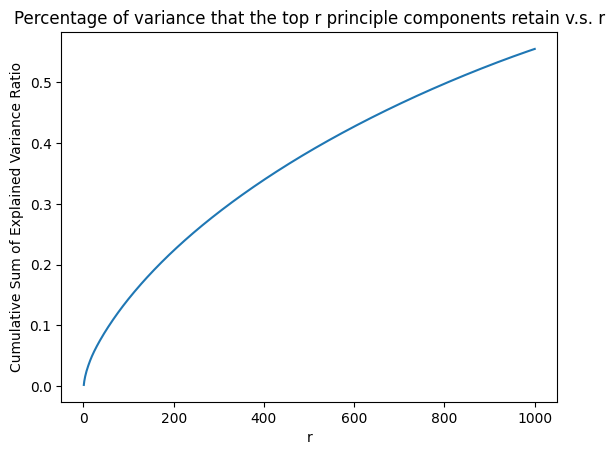

In [ ]:
# Plotting the graph for Percentage of variance that the top r principle components retain v.s. r for r=1 to 1000
plt.plot(np.linspace(1,1000,1000),np.cumsum(svd.explained_variance_ratio_))
plt.title('Percentage of variance that the top r principle components retain v.s. r')
plt.ylabel('Cumulative Sum of Explained Variance Ratio')
plt.xlabel('r')
plt.savefig('Q4.png')
plt.show()

QUESTION 4: Report the plot of the percentage of variance that the top r principle components retain v.s. r, for r = 1 to 1000.
> Please refer to the figure above for the plot. We see that as we increase the value of r, the explained variance ratio increases as well.

# **Question 5**

In [ ]:
#Lists to store the 5 measure scores
svd_homogeneity_score = []
svd_completeness_score = []
svd_v_measure_score = []
svd_adjusted_rand_score = []
svd_adjusted_mutual_info_score = []
nmf_homogeneity_score = []
nmf_completeness_score = []
nmf_v_measure_score = []
nmf_adjusted_rand_score = []
nmf_adjusted_mutual_info_score = []

values_of_r = [1,2,3,4,5,6,7,8,9,10,20,50,100,300]

#Looping through the values of r and storing the SVD and NMF measure score values
for i in range(len(values_of_r)):
    svd = TruncatedSVD(n_components=values_of_r[i], random_state=0)
    svd_tfidf = svd.fit_transform(X_tfidf)
    svd_kmeans = kmeans.fit_predict(svd_tfidf)
    svd_homogeneity_score.append(homogeneity_score(labels, svd_kmeans))
    svd_completeness_score.append(completeness_score(labels, svd_kmeans))
    svd_v_measure_score.append(v_measure_score(labels, svd_kmeans))
    svd_adjusted_rand_score.append(adjusted_rand_score(labels, svd_kmeans))
    svd_adjusted_mutual_info_score.append(adjusted_mutual_info_score(labels, svd_kmeans))
    nmf = NMF(n_components=values_of_r[i], init='random', random_state=0, max_iter=1000)
    nmf_tfidf = nmf.fit_transform(X_tfidf)
    nmf_kmeans = kmeans.fit_predict(nmf_tfidf)
    nmf_homogeneity_score.append(homogeneity_score(labels, nmf_kmeans))
    nmf_completeness_score.append(completeness_score(labels, nmf_kmeans))
    nmf_v_measure_score.append(v_measure_score(labels, nmf_kmeans))
    nmf_adjusted_rand_score.append(adjusted_rand_score(labels, nmf_kmeans))
    nmf_adjusted_mutual_info_score.append(adjusted_mutual_info_score(labels, nmf_kmeans))

print('SVD Homogeneity score: ', svd_homogeneity_score)
print('NMF Homogeneity score: ', nmf_homogeneity_score)
print('SVD Completeness score: ', svd_completeness_score)
print('NMF Completeness score: ', nmf_completeness_score)
print('SVD V Measure Score: ', svd_v_measure_score)
print('NMF V Measure Score: ', nmf_v_measure_score)
print('SVD Adjusted Rand Score: ', svd_adjusted_rand_score)
print('NMF Adjusted Rand Score: ', nmf_adjusted_rand_score)
print('SVD Adjusted Mutual Info Score: ', svd_adjusted_mutual_info_score)
print('NMF Adjusted Mutual Info Score: ', nmf_adjusted_mutual_info_score)

SVD Homogeneity score:  [0.01902337811007352, 0.5290568591667052, 0.5365447497341121, 0.5016830689046078, 0.517181813266304, 0.5260710703947462, 0.5266336037198717, 0.540259824807012, 0.5420325782396572, 0.5457748982496018, 0.55992653413914, 0.5646288733113103, 0.5670330934635874, 0.5744113629390132]
NMF Homogeneity score:  [0.01902337811007352, 0.5022478335120428, 0.4944996962293327, 0.1991820532532903, 0.4565953037590732, 0.5089511512346101, 0.49501867420758044, 0.503425423614795, 0.13011170444318357, 0.25514281868540645, 0.06529404662847933, 0.0038898116642746656, 0.007502018996706376, 0.011022010519163693]
SVD Completeness score:  [0.019335888410498315, 0.5466431001230201, 0.5533218771079376, 0.527589042569797, 0.5401081045141642, 0.5442693539631456, 0.5446271230704749, 0.5563777779464202, 0.5586330790474212, 0.5626648228573083, 0.576150402938106, 0.5799581025445832, 0.5823852599054565, 0.5892858802537996]
NMF Completeness score:  [0.019335888410498315, 0.5263843051392446, 0.518932

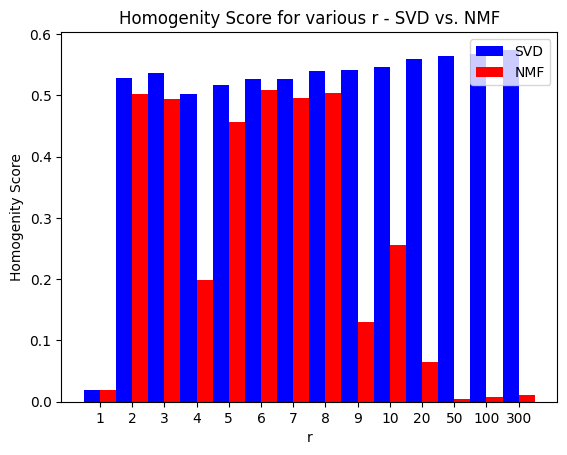

In [ ]:
#Plotting a graph for Homogenity Score for various r - SVD vs. NMF
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(values_of_r)) - 0.5/2, svd_homogeneity_score, 0.5, label='SVD', color = 'blue')
rects2 = ax.bar(np.arange(len(values_of_r)) + 0.5/2, nmf_homogeneity_score, 0.5, label='NMF', color = 'red' )
ax.set_ylabel('Homogenity Score')
ax.set_title('Homogenity Score for various r - SVD vs. NMF')
ax.set_xticks(np.arange(len(values_of_r)))
ax.set_xticklabels(values_of_r)
ax.set_xlabel('r')
ax.legend()
plt.savefig('Q5 - Homogenity Score.png')
plt.show()

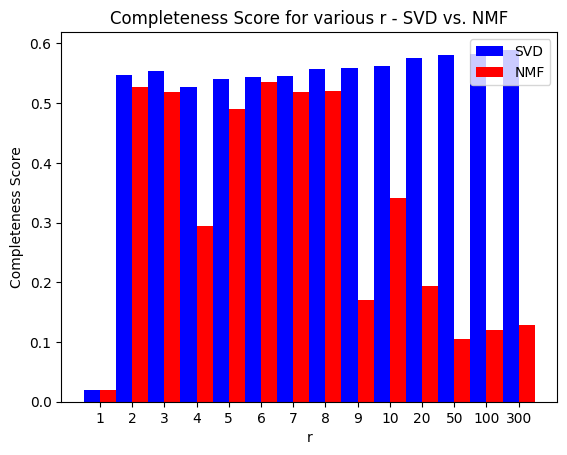

In [ ]:
#Plotting a graph for Completeness Score for various r - SVD vs. NMF
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(values_of_r)) - 0.5/2, svd_completeness_score, 0.5, label='SVD', color = 'blue')
rects2 = ax.bar(np.arange(len(values_of_r)) + 0.5/2, nmf_completeness_score, 0.5, label='NMF', color = 'red' )
ax.set_ylabel('Completeness Score')
ax.set_title('Completeness Score for various r - SVD vs. NMF')
ax.set_xticks(np.arange(len(values_of_r)))
ax.set_xticklabels(values_of_r)
ax.set_xlabel('r')
ax.legend()
plt.savefig('Q5 - Completeness Score.png')
plt.show()

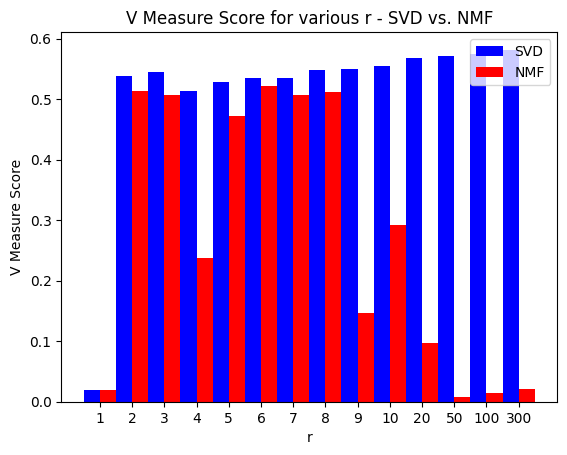

In [ ]:
#Plotting a graph for V Measure Score for various r - SVD vs. NMF
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(values_of_r)) - 0.5/2, svd_v_measure_score, 0.5, label='SVD', color = 'blue')
rects2 = ax.bar(np.arange(len(values_of_r)) + 0.5/2, nmf_v_measure_score, 0.5, label='NMF', color = 'red' )
ax.set_ylabel('V Measure Score')
ax.set_title('V Measure Score for various r - SVD vs. NMF')
ax.set_xticks(np.arange(len(values_of_r)))
ax.set_xticklabels(values_of_r)
ax.set_xlabel('r')
ax.legend()
plt.savefig('Q5 - V Measure Score.png')
plt.show()

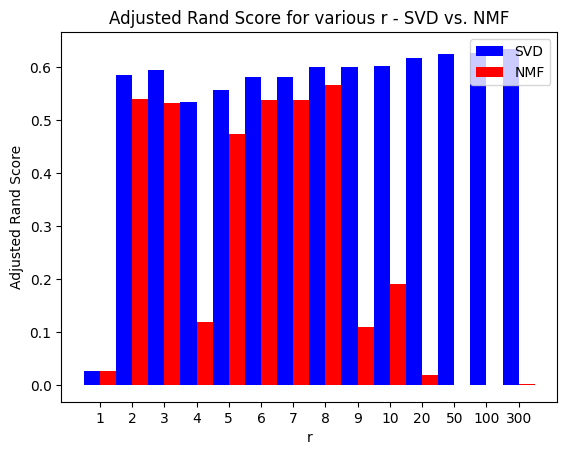

In [ ]:
#Plotting a graph for Adjusted Rand Score for various r - SVD vs. NMF
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(values_of_r)) - 0.5/2, svd_adjusted_rand_score, 0.5, label='SVD', color = 'blue')
rects2 = ax.bar(np.arange(len(values_of_r)) + 0.5/2, nmf_adjusted_rand_score, 0.5, label='NMF', color = 'red' )
ax.set_ylabel('Adjusted Rand Score')
ax.set_title('Adjusted Rand Score for various r - SVD vs. NMF')
ax.set_xticks(np.arange(len(values_of_r)))
ax.set_xticklabels(values_of_r)
ax.set_xlabel('r')
ax.legend()
plt.savefig('Q5 - Adjusted Rand Score.png')
plt.show()

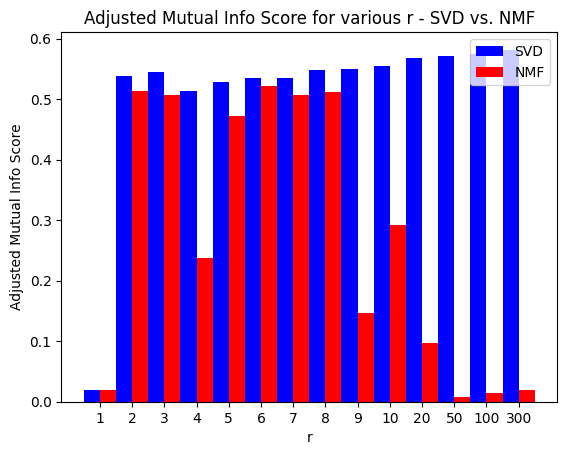

In [ ]:
#Plotting a graph for Adjusted Mutual Info Score for various r - SVD vs. NMF
fig, ax = plt.subplots()
rects1 = ax.bar(np.arange(len(values_of_r)) - 0.5/2, svd_adjusted_mutual_info_score, 0.5, label='SVD', color = 'blue')
rects2 = ax.bar(np.arange(len(values_of_r)) + 0.5/2, nmf_adjusted_mutual_info_score, 0.5, label='NMF', color = 'red' )
ax.set_ylabel('Adjusted Mutual Info Score')
ax.set_title('Adjusted Mutual Info Score for various r - SVD vs. NMF')
ax.set_xticks(np.arange(len(values_of_r)))
ax.set_xticklabels(values_of_r)
ax.set_xlabel('r')
ax.legend()
plt.savefig('Q5 - Adjusted Mutual Info Score.png')
plt.show()

QUESTION 5:
Let r be the dimension that we want to reduce the data to (i.e. n components).
Try r = 1 − 10, 20, 50, 100, 300, and plot the 5 measure scores v.s. r for both SVD and NMF.

Report a good choice of r for SVD and NMF respectively.
Note: In the choice of r, there is a trade-off between the information preservation, and better performance of k-means in lower dimensions.

> From the above graphs, we can see that the good value of r is as below:

>> SVD = 300

>> NMF = 6

# **Question 6**

QUESTION 6: How do you explain the non-monotonic behavior of the measures as r increases?

> For both SVD and NMF, as we increase the value of r, the variance retained in the reduced dimensions increases. Initially, when we increase the value of r, the clustering performance tends to improve as more information is preserved. However, beyond a certain point, increasing r may lead to overfitting or noise amplification, resulting in poorer clustering performance. This drop is observed because it becomes a high dimensional matrix. At higher values of r, more noise and irrelevant features are captured. The behavior of the k-means depends on the dimensionality of the data and the clustering task can also contribute to the non-monotonic trend. Kmeans using euclidean distance and this measure is not good for high dimensional space. Choosing an appropriate value of r involves balancing the trade-off between retaining sufficient information for clustering while avoiding overfitting or noise amplification


# **Question 7**

QUESTION 7: Are these measures on average better than those computed in Question 3?

> Kmeans on Sparse Data:\
Homogeneity: 0.559685\
Completeness: 0.575387\
V-measure: 0.567427\
Adjusted Rand-Index: 0.618695\
Adjusted Mutual Information Score: 0.567387

> Kmeans on SVD with r=300\
Homogeneity: 0.5744113629390132\
Completeness: 0.5892858802537996\
V-measure: 0.5817535576669169\
Adjusted Rand-Index: 0.6343636646220453\
Adjusted Mutual Information Score: 0.581714777252691

>Kmeans on NMF with r=6\
Homogeneity: 0.5089511512346101\
Completeness: 0.53589420450147\
V-measure: 0.5220752924318337\
Adjusted Rand-Index: 0.5376953934942157\
Adjusted Mutual Information Score: 0.5220304090691056

We can see that SVD with r=300 has performed better than NMF with r=6. Also, for sparse data and SVD with r=300, the measure scores are pretty similar with the SVD values just slightly higher


# **Question 8**

In [ ]:
#Optimum value of r for SVD is r=300
svd_optimum = TruncatedSVD(n_components=300, random_state=0)
svd_tfidf_optimum = svd_optimum.fit_transform(X_tfidf)
svd_kmeans_optimum = kmeans.fit_predict(svd_tfidf_optimum)

In [ ]:
#Optimum value of r for NMF is r=6
nmf_optimum = NMF(n_components=6, init='random', random_state=0, max_iter=1000)
nmf_tfidf_optimum = nmf_optimum.fit_transform(X_tfidf)
nmf_kmeans_optimum = kmeans.fit_predict(nmf_tfidf_optimum)

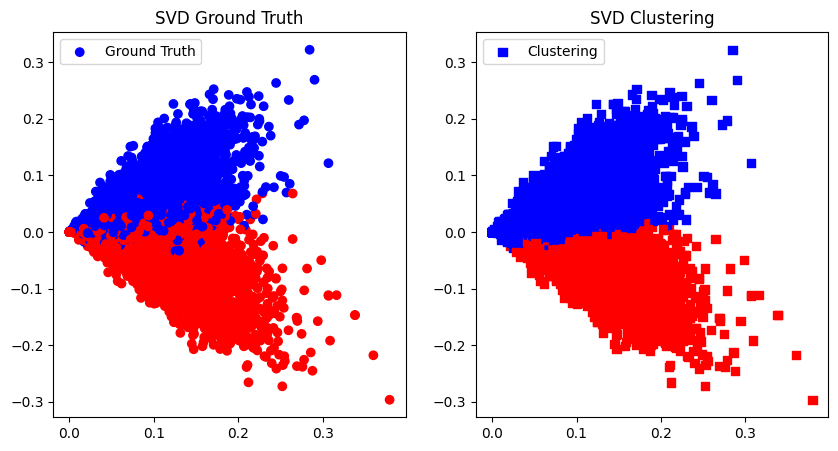

In [ ]:
#Visualising clustering results for SVD
# Assigning unique colors to ground truth class labels
color_map_ground_truth = {0: 'red', 1: 'blue'}
colors_ground_truth = [color_map_ground_truth[label] for label in labels]

# Assigning unique colors to clustering labels
color_map_clustering = {0: 'red', 1: 'blue'}
colors_clustering = [color_map_clustering[label] for label in svd_kmeans_optimum]

# Plotting
plt.figure(figsize=(10, 5))

# Ground Truth Plot
plt.subplot(1, 2, 1)
plt.scatter(svd_tfidf_optimum[:, 0], svd_tfidf_optimum[:, 1], c=colors_ground_truth, marker='o', label='Ground Truth')
plt.title('SVD Ground Truth')
plt.legend()

# Clustering Plot
plt.subplot(1, 2, 2)
plt.scatter(svd_tfidf_optimum[:, 0], svd_tfidf_optimum[:, 1], c=colors_clustering, marker='s', label='Clustering')
plt.title('SVD Clustering')
plt.legend()

plt.show()

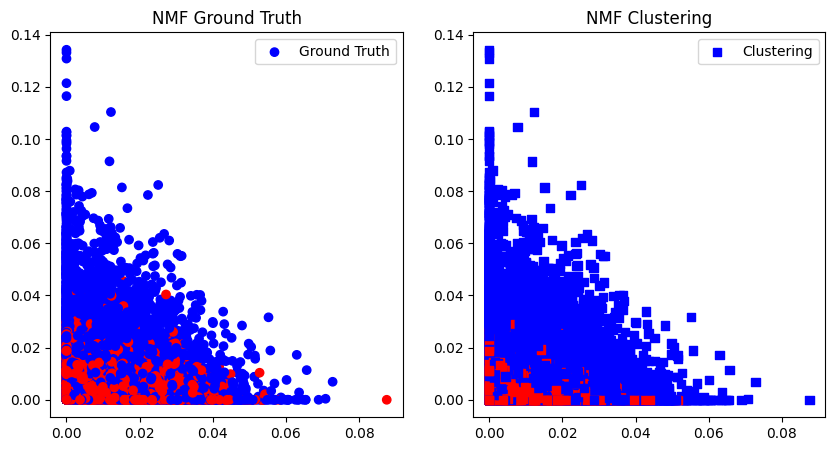

In [ ]:
#Visualising clustering results for NMF
# Assigning unique colors to ground truth class labels
color_map_ground_truth = {0: 'red', 1: 'blue'}
colors_ground_truth = [color_map_ground_truth[label] for label in labels]

# Assigning unique colors to clustering labels
color_map_clustering = {0: 'red', 1: 'blue'}
colors_clustering = [color_map_clustering[label] for label in nmf_kmeans_optimum]

# Plotting
plt.figure(figsize=(10, 5))

# Ground Truth Plot
plt.subplot(1, 2, 1)
plt.scatter(nmf_tfidf_optimum[:, 0], nmf_tfidf_optimum[:, 1], c=colors_ground_truth, marker='o', label='Ground Truth')
plt.title('NMF Ground Truth')
plt.legend()

# Clustering Plot
plt.subplot(1, 2, 2)
plt.scatter(nmf_tfidf_optimum[:, 0], nmf_tfidf_optimum[:, 1], c=colors_clustering, marker='s', label='Clustering')
plt.title('NMF Clustering')
plt.legend()

plt.show()

QUESTION 8: Visualize the clustering results for:

* SVD with your optimal choice of r for K-Means clustering;

* NMF with your choice of r for K-Means clustering.

> Here I have plotted both the graphs for SVD and NMF using the optimum value of r obtained. Refer to the figures above for the same.

# **Question 9**

QUESTION 9: What do you observe in the visualization? How are the data points of the two classes distributed? Is distribution of the data ideal for K-Means clustering?

> We can see that Kmeans assumes that the clusters are isotropic in nature. We notice that NMF shows uneven cluster sizes. Even SVD shows uneven cluster sizes but it is better than NMF. Both show unequal variances for the clusters. For SVD, both the clusters are equally distributed. For NMF, one cluster is very compact and the other one is spread out. For both, there is an overlap of clusters which means that there is a smaller euclidean distance between the centroids of the clusters which means low performance and hence this is not very ideal.


# **Question 10**

In [ ]:
#Fetching the data for all categories
newsgroups_all_categories = fetch_20newsgroups(subset='all', remove=('headers', 'footers'), random_state=0)
newsgroups_all_categories.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
#Checking which number in target corresponds to which target name
i, id = np.unique(newsgroups_all_categories.target, return_index=True)
for i in range(len(id)):
    print(newsgroups_all_categories.target_names[i],' corresponds to index = ', newsgroups_all_categories.target[id[i]])

alt.atheism  corresponds to index =  0
comp.graphics  corresponds to index =  1
comp.os.ms-windows.misc  corresponds to index =  2
comp.sys.ibm.pc.hardware  corresponds to index =  3
comp.sys.mac.hardware  corresponds to index =  4
comp.windows.x  corresponds to index =  5
misc.forsale  corresponds to index =  6
rec.autos  corresponds to index =  7
rec.motorcycles  corresponds to index =  8
rec.sport.baseball  corresponds to index =  9
rec.sport.hockey  corresponds to index =  10
sci.crypt  corresponds to index =  11
sci.electronics  corresponds to index =  12
sci.med  corresponds to index =  13
sci.space  corresponds to index =  14
soc.religion.christian  corresponds to index =  15
talk.politics.guns  corresponds to index =  16
talk.politics.mideast  corresponds to index =  17
talk.politics.misc  corresponds to index =  18
talk.religion.misc  corresponds to index =  19


In [ ]:
#Making a sparse TF-IDF matrix using TF-IDF vectorizer with min_df=3 and removing stopwords
vectorizer_all_categories = TfidfVectorizer(min_df=3,stop_words="english")
X_tfidf_all_categories = vectorizer_all_categories.fit_transform(newsgroups_all_categories.data)
X_tfidf_all_categories.shape

(18846, 45365)

In [ ]:
#Performing kmeans using the conditions specified in the question
kmeans_all_categories = KMeans(n_clusters=20,max_iter=1000,n_init=30, random_state=0)
kmeans_all_categories.fit(X_tfidf_all_categories)

KMeans(max_iter=1000, n_clusters=20, n_init=30, random_state=0)

In [ ]:
#Reporting the 5 clustering measures
print("Homogeneity: %f" % homogeneity_score(newsgroups_all_categories.target, kmeans_all_categories.labels_))
print("Completeness: %f" % completeness_score(newsgroups_all_categories.target, kmeans_all_categories.labels_))
print("V-measure: %f" % v_measure_score(newsgroups_all_categories.target, kmeans_all_categories.labels_))
print("Adjusted Rand-Index: %f"% adjusted_rand_score(newsgroups_all_categories.target, kmeans_all_categories.labels_))
print("Adjusted Mutual Information Score: %f"% adjusted_mutual_info_score(newsgroups_all_categories.target, kmeans_all_categories.labels_))
#Contingency table of the clustering result
contingencyMatrix = metrics.cluster.contingency_matrix(newsgroups_all_categories.target, kmeans_all_categories.labels_)
print(contingencyMatrix)

Homogeneity: 0.327942
Completeness: 0.375275
V-measure: 0.350016
Adjusted Rand-Index: 0.116144
Adjusted Mutual Information Score: 0.347767
[[  1   0 183  50  88   0   0   2   0 113 153 112   2   4  25   0  61   0
    0   5]
 [  1  33  57   0 225 378   0   0   0   0  19   0   0 151   7   7  32   0
   63   0]
 [  0 414  69   0 147 132   0   0  19   0   8   0   0  78   6   2  26   0
   84   0]
 [  3  50  43   0 221  26   2   3 211   0   5   0   0 141   1  13  37   0
  226   0]
 [  1   7 107   0 350  21   0   0 111   0   6   0   0 144  10  12  31   0
  163   0]
 [  7  62  39   0 192 515   0   0   1   0   5   0   0 124   1   7  24   0
   11   0]
 [  0  13  34   0 211   6   8  21  52   0   5   0   0  69   1 495  17   0
   43   0]
 [  0   2 120   0 237   2   0 426   2   0  28   0   0  40  15   9 108   0
    0   1]
 [  0   0 184   0 422   0   2  40   8   0  30   0   0  36  10   9 255   0
    0   0]
 [  0   0 215   0 288   1 333   0   0   0  17   0   0  41  18   8  73   0
    0   0]
 [  0   0  

In [ ]:
#Lists to store the 5 measure scores
svd_all_categories_homogeneity_score = []
svd_all_categories_completeness_score = []
svd_all_categories_v_measure_score = []
svd_all_categories_adjusted_rand_score = []
svd_all_categories_adjusted_mutual_info_score = []

values_of_r = [1,2,3,4,5,6,7,8,9,10,20,50,100,300]

#Looping through the values of r and storing the SVD measure score values
for i in range(len(values_of_r)):
    svd_all_categories = TruncatedSVD(n_components=values_of_r[i], random_state=0)
    svd_all_categories_tfidf = svd_all_categories.fit_transform(X_tfidf_all_categories)
    svd_all_categories_kmeans = kmeans_all_categories.fit_predict(svd_all_categories_tfidf)
    svd_all_categories_homogeneity_score.append(homogeneity_score(newsgroups_all_categories.target, svd_all_categories_kmeans))
    svd_all_categories_completeness_score.append(completeness_score(newsgroups_all_categories.target, svd_all_categories_kmeans))
    svd_all_categories_v_measure_score.append(v_measure_score(newsgroups_all_categories.target, svd_all_categories_kmeans))
    svd_all_categories_adjusted_rand_score.append(adjusted_rand_score(newsgroups_all_categories.target, svd_all_categories_kmeans))
    svd_all_categories_adjusted_mutual_info_score.append(adjusted_mutual_info_score(newsgroups_all_categories.target, svd_all_categories_kmeans))

print('SVD Homogeneity score: ', svd_all_categories_homogeneity_score)
print('SVD Completeness score: ', svd_all_categories_completeness_score)
print('SVD V Measure Score: ', svd_all_categories_v_measure_score)
print('SVD Adjusted Rand Score: ', svd_all_categories_adjusted_rand_score)
print('SVD Adjusted Mutual Info Score: ', svd_all_categories_adjusted_mutual_info_score)

SVD Homogeneity score:  [0.024233513537244858, 0.21234220367375337, 0.24711172744480633, 0.3036095343951449, 0.32016271714698474, 0.30371229268958294, 0.3164819324291877, 0.32326522413972414, 0.3222421683872278, 0.32494049403973524, 0.33303533030565696, 0.28388555847121416, 0.3307545340133053, 0.2976251438838621]
SVD Completeness score:  [0.02673996633386354, 0.22459003819124504, 0.26536211866091736, 0.32724707843578327, 0.3482890305417125, 0.33203700876084774, 0.3472853196717527, 0.3501810494821615, 0.34529248650436317, 0.3542622607632521, 0.3756147353734766, 0.3556956839271337, 0.39998464796440997, 0.3720767741278082]
SVD V Measure Score:  [0.025425116659709947, 0.2182944587890424, 0.2559119535133701, 0.31498546926601595, 0.3336341411516645, 0.31724367123480346, 0.33116888103810926, 0.33618526045596037, 0.3333693577213716, 0.33896845446522134, 0.3530458360796032, 0.315759316201346, 0.3620901659929847, 0.3307125168893496]
SVD Adjusted Rand Score:  [0.005297741266282442, 0.065759559944

In [ ]:
#Finding the average of all the metrics to find the best value of r
avg_metrics = [y/5 for y in [sum(x) for x in zip(svd_all_categories_homogeneity_score, svd_all_categories_completeness_score, svd_all_categories_v_measure_score, svd_all_categories_adjusted_rand_score, svd_all_categories_adjusted_mutual_info_score)]]
best_value_of_r_SVD = values_of_r[avg_metrics.index(max(avg_metrics))]
print('Best value of r for SVD: ', best_value_of_r_SVD, ', with the average value of 5 metrics: ',max(avg_metrics))

Best value of r for SVD:  100 , with the average value of 5 metrics:  0.3128069316335742


In [ ]:
#Printing the metrics and confusion matrix for the best value of r for SVD
svd_all_categories = TruncatedSVD(n_components=best_value_of_r_SVD, random_state=0)
svd_tfidf_all_categories = svd_all_categories.fit_transform(X_tfidf_all_categories)
svd_kmeans_all_categories = kmeans_all_categories.fit_predict(svd_tfidf_all_categories)
svd_all_categories_homogeneity_score = homogeneity_score(newsgroups_all_categories.target, svd_kmeans_all_categories)
svd_all_categories_completeness_score = completeness_score(newsgroups_all_categories.target, svd_kmeans_all_categories)
svd_all_categories_v_measure_score = v_measure_score(newsgroups_all_categories.target, svd_kmeans_all_categories)
svd_all_categories_adjusted_rand_score = adjusted_rand_score(newsgroups_all_categories.target, svd_kmeans_all_categories)
svd_all_categories_adjusted_mutual_info_score = adjusted_mutual_info_score(newsgroups_all_categories.target, svd_kmeans_all_categories)
contingencyMatrix_all_categories_svd = metrics.cluster.contingency_matrix(newsgroups_all_categories.target, svd_kmeans_all_categories)
print("Homogeneity score for all categories using SVD is: ", svd_all_categories_homogeneity_score)
print("Completeness score for all categories using SVD is: ", svd_all_categories_completeness_score)
print("V Measure score for all categories using SVD is: ", svd_all_categories_v_measure_score)
print("Adjusted Rand score for all categories using SVD is: ", svd_all_categories_adjusted_rand_score)
print("Adjusted Mutual Info score for all categories using SVD is: ", svd_all_categories_adjusted_mutual_info_score)
print("Contingency Matrix for all categories using SVD is: ")
print(contingencyMatrix_all_categories_svd)

Homogeneity score for all categories using SVD is:  0.3307545340133053
Completeness score for all categories using SVD is:  0.39998464796440997
V Measure score for all categories using SVD is:  0.3620901659929847
Adjusted Rand score for all categories using SVD is:  0.1113858195844356
Adjusted Mutual Info score for all categories using SVD is:  0.35981949061273566
Contingency Matrix for all categories using SVD is: 
[[  2   0   0  71   0   0   0  27   0  80   0   2   1   1 293   0 164  54
    3 101]
 [ 10   0   0 315 420   1  37   7   0  35  66   0   1   0  21   0  60   0
    0   0]
 [  0   0   0 187 139  15 430   6   4  30  91   0   0   0   9   0  74   0
    0   0]
 [  3   0   0 359  34 148  49   1  73  48 213   1   3   0   3   1  46   0
    0   0]
 [  4   0   0 517  23  94   8   7  32  33 126   0   2   0   8   0 109   0
    0   0]
 [  6   0   0 215 622   1  57   1   0  26  10   0   7   0   4   0  39   0
    0   0]
 [  0   0   0 701   4  79  20   1   6  18  55  27   0   0   7  13  44 

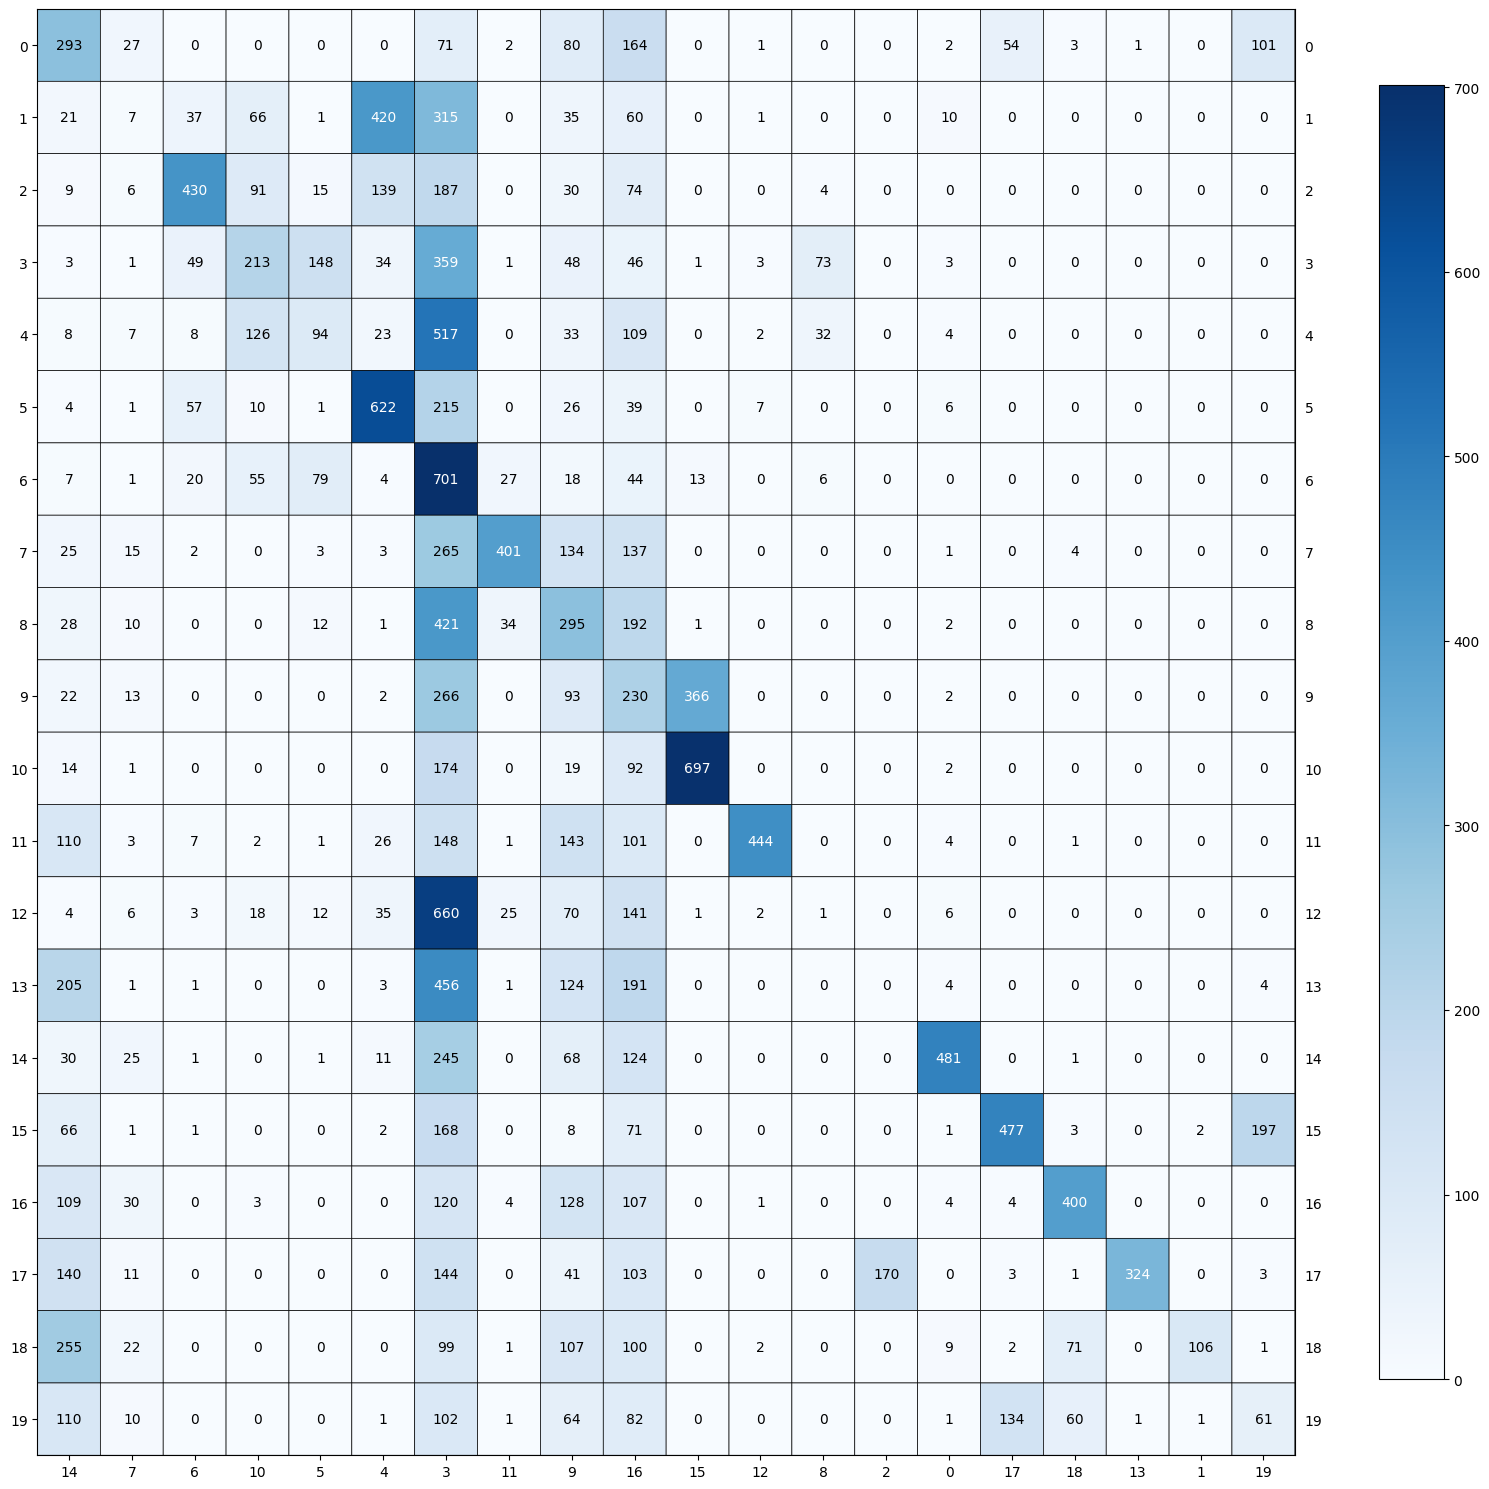

In [ ]:
#Plotting the contingency matrix
rows_svd, cols_svd = linear_sum_assignment(contingencyMatrix_all_categories_svd, maximize=True)
plot_mat(contingencyMatrix_all_categories_svd[rows_svd[:, np.newaxis], cols_svd], xticklabels=cols_svd, yticklabels=rows_svd, size=(15,15))

In [ ]:
#Lists to store the 5 measure scores
nmf_all_categories_homogeneity_score = []
nmf_all_categories_completeness_score = []
nmf_all_categories_v_measure_score = []
nmf_all_categories_adjusted_rand_score = []
nmf_all_categories_adjusted_mutual_info_score = []

values_of_r = [1,2,3,4,5,6,7,8,9,10,20,50,100,300]

#Looping through the values of r and storing the NMF measure score values
for i in range(len(values_of_r)):
    nmf_all_categories = NMF(n_components=values_of_r[i], init='random', random_state=0, max_iter=2000)
    nmf_all_categories_tfidf = nmf_all_categories.fit_transform(X_tfidf_all_categories)
    nmf_all_categories_kmeans = kmeans_all_categories.fit_predict(nmf_all_categories_tfidf)
    nmf_all_categories_homogeneity_score.append(homogeneity_score(newsgroups_all_categories.target, nmf_all_categories_kmeans))
    nmf_all_categories_completeness_score.append(completeness_score(newsgroups_all_categories.target, nmf_all_categories_kmeans))
    nmf_all_categories_v_measure_score.append(v_measure_score(newsgroups_all_categories.target, nmf_all_categories_kmeans))
    nmf_all_categories_adjusted_rand_score.append(adjusted_rand_score(newsgroups_all_categories.target, nmf_all_categories_kmeans))
    nmf_all_categories_adjusted_mutual_info_score.append(adjusted_mutual_info_score(newsgroups_all_categories.target, nmf_all_categories_kmeans))

print('NMF Homogeneity score: ', nmf_all_categories_homogeneity_score)
print('NMF Completeness score: ', nmf_all_categories_completeness_score)
print('NMF V Measure Score: ', nmf_all_categories_v_measure_score)
print('NMF Adjusted Rand Score: ', nmf_all_categories_adjusted_rand_score)
print('NMF Adjusted Mutual Info Score: ', nmf_all_categories_adjusted_mutual_info_score)

NMF Homogeneity score:  [0.024239137233528926, 0.19219640113142317, 0.21759697070078016, 0.2793358882097109, 0.2676257983910962, 0.2798300857352491, 0.2924474607293767, 0.2833595252971712, 0.29248781037820104, 0.2879484499953904, 0.2744487797074483, 0.23308715900099994, 0.14850893908931295, 0.05394660845515765]
NMF Completeness score:  [0.02674619037376771, 0.20502118735704658, 0.2561872805484155, 0.30711496924524306, 0.28941948898737657, 0.3028954143827093, 0.3257472103174968, 0.3044976349844565, 0.3331444910454053, 0.3273568778366389, 0.3526034280542059, 0.33967885032303596, 0.19102666978534658, 0.06961818582902575]
NMF V Measure Score:  [0.025431025330945028, 0.1984017601821748, 0.2353205115299862, 0.29256750715283086, 0.27809631843295274, 0.29090626635824224, 0.3082004713360169, 0.29354853911100176, 0.3114951146342911, 0.3063906691674962, 0.3086555771666248, 0.27646465364787426, 0.1671057015881883, 0.06078859328878583]
NMF Adjusted Rand Score:  [0.0052999337984488476, 0.05819280806

In [ ]:
#Finding the average of all the metrics to find the best value of r
avg_metrics_nmf = [y/5 for y in [sum(x) for x in zip(nmf_all_categories_homogeneity_score, nmf_all_categories_completeness_score, nmf_all_categories_v_measure_score, nmf_all_categories_adjusted_rand_score, nmf_all_categories_adjusted_mutual_info_score)]]
best_value_of_r_NMF = values_of_r[avg_metrics_nmf.index(max(avg_metrics_nmf))]
print('Best value of r for NMF: ', best_value_of_r_NMF, ', with the average value of 5 metrics: ',max(avg_metrics_nmf))

Best value of r for NMF:  9 , with the average value of 5 metrics:  0.2692050158980476


In [ ]:
#Printing the metrics and confusion matrix for the best value of r for NMF
nmf_all_categories = NMF(n_components=best_value_of_r_NMF, init='random', random_state=0, max_iter=1000)
nmf_tfidf_all_categories = nmf_all_categories.fit_transform(X_tfidf_all_categories)
nmf_kmeans_all_categories = kmeans_all_categories.fit_predict(nmf_tfidf_all_categories)
nmf_all_categories_homogeneity_score = homogeneity_score(newsgroups_all_categories.target, nmf_kmeans_all_categories)
nmf_all_categories_completeness_score = completeness_score(newsgroups_all_categories.target, nmf_kmeans_all_categories)
nmf_all_categories_v_measure_score = v_measure_score(newsgroups_all_categories.target, nmf_kmeans_all_categories)
nmf_all_categories_adjusted_rand_score = adjusted_rand_score(newsgroups_all_categories.target, nmf_kmeans_all_categories)
nmf_all_categories_adjusted_mutual_info_score = adjusted_mutual_info_score(newsgroups_all_categories.target, nmf_kmeans_all_categories)
contingencyMatrix_all_categories_nmf = metrics.cluster.contingency_matrix(newsgroups_all_categories.target, nmf_kmeans_all_categories)
print("Homogeneity score for all categories using NMF is: ", nmf_all_categories_homogeneity_score)
print("Completeness score for all categories using NMF is: ", nmf_all_categories_completeness_score)
print("V Measure score for all categories using NMF is: ", nmf_all_categories_v_measure_score)
print("Adjusted Rand score for all categories using NMF is: ", nmf_all_categories_adjusted_rand_score)
print("Adjusted Mutual Info score for all categories using NMF is: ", nmf_all_categories_adjusted_mutual_info_score)
print("Contingency Matrix for all categories using NMF is: ")
print(contingencyMatrix_all_categories_nmf)

Homogeneity score for all categories using NMF is:  0.29248781037820104
Completeness score for all categories using NMF is:  0.3331444910454053
V Measure score for all categories using NMF is:  0.3114951146342911
Adjusted Rand score for all categories using NMF is:  0.0997830764438181
Adjusted Mutual Info score for all categories using NMF is:  0.30911458698852257
Contingency Matrix for all categories using NMF is: 
[[120   8   0   0   0   0   0  20   0  87   1   0  62 157 144  30   0 169
    1   0]
 [ 15 282   1   4  30  22   0   0   0   0   0   0 238  50   0   0 175  63
    7  86]
 [  7  77   0  21  55 270   0   0   5   0   0   0 100  25   0   0 336  48
    4  37]
 [  3  98   2 154 127  15   1   0 119   0   0   2  93  23   0   0  74  30
   16 225]
 [  6 106   4 122  90   2   0   0  33   0   0   0 122  55   0   1  15  71
   16 320]
 [  5 159   0   1   4  49   5   0   0   0   0   0 259  34   0   0 383  46
   18  25]
 [  5  77  22  68  67   5   0   0  23   0   0   6 274  41   0   0  26 

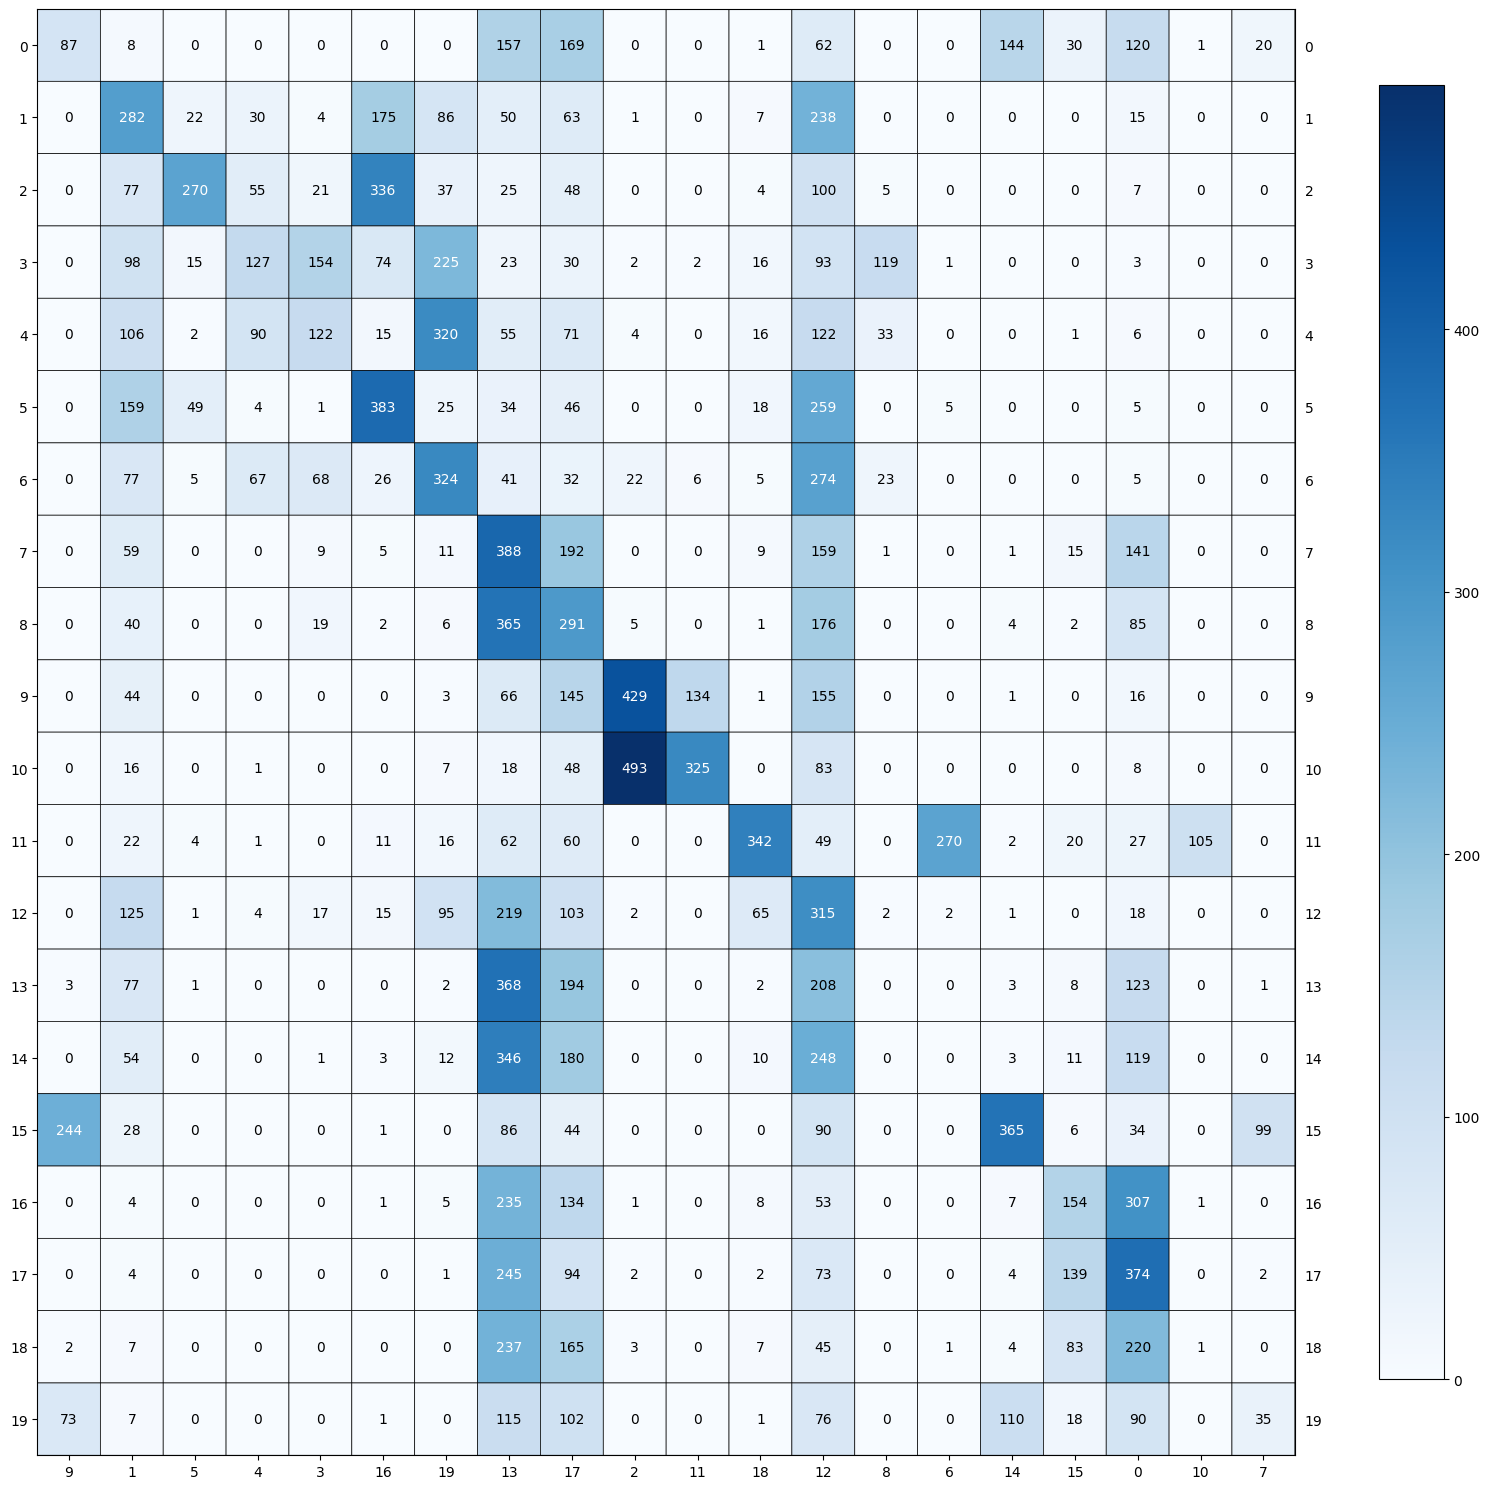

In [ ]:
#Plotting the contingency matrix
rows_nmf, cols_nmf = linear_sum_assignment(contingencyMatrix_all_categories_nmf, maximize=True)
plot_mat(contingencyMatrix_all_categories_nmf[rows_nmf[:, np.newaxis], cols_nmf], xticklabels=cols_nmf, yticklabels=rows_nmf, size=(15,15))

QUESTION 10: Load documents with the same configuration as in Question 1, but for ALL 20 categories. Construct the TF-IDF matrix, reduce its dimensionality using BOTH NMF and SVD (specify settings you choose and why), and perform K-Means clustering with k=20 . Visualize the contingency matrix and report the five clustering metrics (DO BOTH NMF AND SVD).

There is a mismatch between cluster labels and class labels. For example, the cluster #3 may correspond to the class #8. As a result, the high-value entries of the 20 × 20 contingency matrix can be scattered around, making it messy to inspect, even if the clustering result is not bad.

One can use scipy.optimize.linear_sum_assignment to identify the best-matching cluster-class pairs, and permute the columns of the contingency matrix accordingly.

>SVD:\
Best value of r for SVD:  100 , with the average value of 5 metrics:  0.3128069316335742\
The settings we chose for SVD is r=100 as it has the highest average value for all 5 metrics.\
Below are the five clustering metrics:\
Homogeneity score for all categories using SVD is:  0.3307545340133053\
Completeness score for all categories using SVD is:  0.39998464796440997\
V Measure score for all categories using SVD is:  0.3620901659929847\
Adjusted Rand score for all categories using SVD is:  0.1113858195844356\
Adjusted Mutual Info score for all categories using SVD is:  0.35981949061273566\
The contingency matrix can be found above.

>NMF:\
Best value of r for NMF:  9 , with the average value of 5 metrics:  0.2692050158980476\
The settings we chose for NMF is r=9 as it has the highest average value for all 5 metrics.\
Below are the five clustering metrics:\
Homogeneity score for all categories using NMF is:  0.29248781037820104\
Completeness score for all categories using NMF is:  0.3331444910454053\
V Measure score for all categories using NMF is:  0.3114951146342911\
Adjusted Rand score for all categories using NMF is:  0.0997830764438181\
Adjusted Mutual Info score for all categories using NMF is:  0.30911458698852257\
The contingency matrix can be found above.



# **Question 11**

Homogeneity score for all categories using  5  components and  cosine  metrics is:  0.5531525085510313
Completeness score for all categories using  5  components and  cosine  metrics is:  0.5829782139137853
V Measure score for all categories using  5  components and  cosine  metrics is:  0.5676738690023347
Adjusted Rand score for all categories using  5  components and  cosine  metrics is:  0.42998284859282154
Adjusted Mutual Info score for all categories using  5  components and  cosine  metrics is:  0.5662283570153432
Contingency Matrix for all categories using  5  components and  cosine  metrics is: 
[[  3   5 128   1   1   1   0  22  16   7   1   7   0   7   0   0 593   0
    5   2]
 [571   9   1   3   1   1   4   2 197   4   9   3  53   6   2   0   4  98
    5   0]
 [249   6   2  12  11  24   4   1  51   2  14   4 456   9   0  10   1 126
    3   0]
 [ 29   8   1   1   2 314   2   1  47   4  42   2  75   8   0   0   2 442
    1   1]
 [ 59  16   2   5   4 189   4   1  69   3  55   6

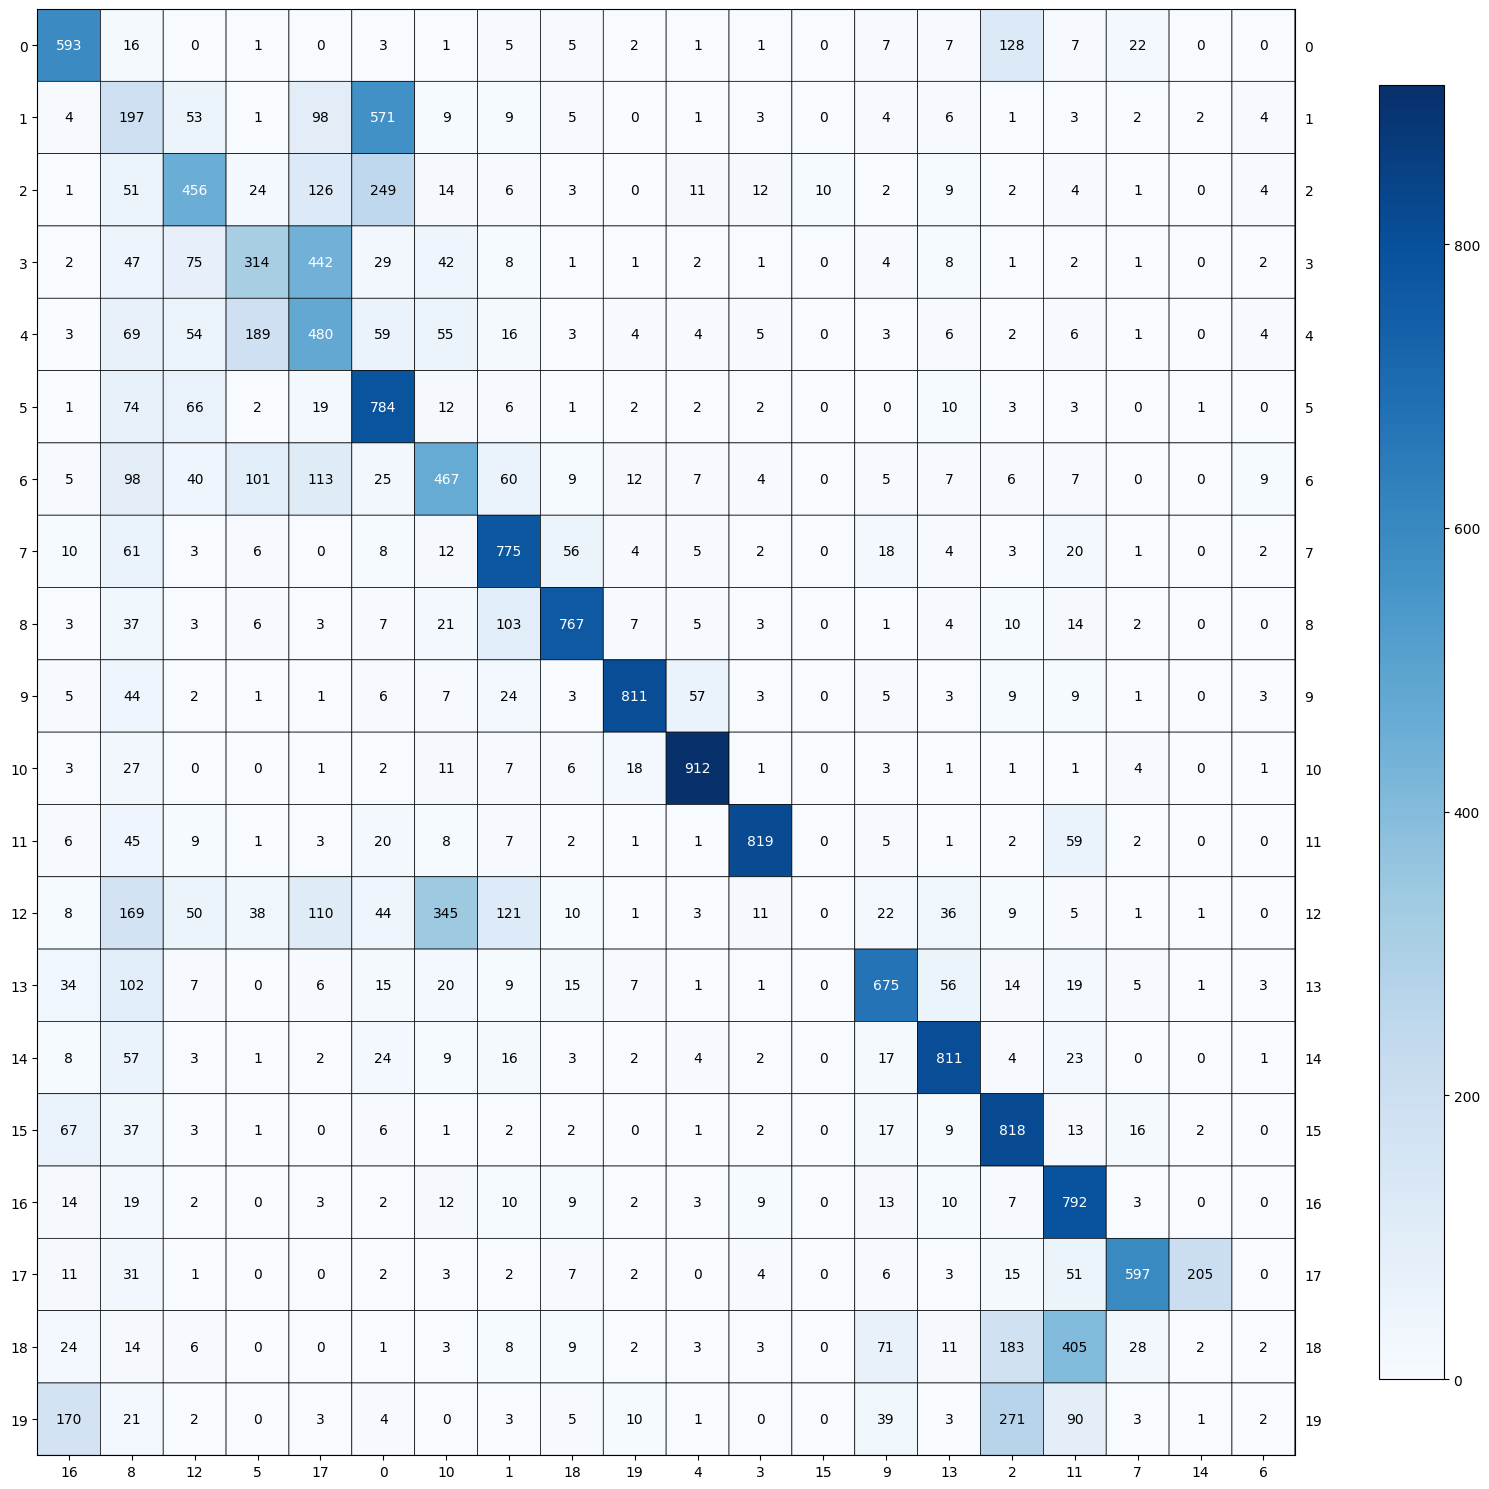

Homogeneity score for all categories using  5  components and  euclidean  metrics is:  0.007891363023388595
Completeness score for all categories using  5  components and  euclidean  metrics is:  0.008069457254962472
V Measure score for all categories using  5  components and  euclidean  metrics is:  0.007979416532494715
Adjusted Rand score for all categories using  5  components and  euclidean  metrics is:  0.0010915638250219436
Adjusted Mutual Info score for all categories using  5  components and  euclidean  metrics is:  0.004738753061765688
Contingency Matrix for all categories using  5  components and  euclidean  metrics is: 
[[38 52 59 41 54 45 30 15 33 31 38 46 36 37 65 60 52 33  0 34]
 [50 54 70 47 68 57 32 32 40 45 34 64 51  9 69 80 74 48  0 49]
 [50 43 62 36 47 63 32 74 53 41 46 61 44 20 82 64 64 43 10 50]
 [43 64 66 49 74 54 48 56 50 45 37 50 50  4 70 81 57 34  0 50]
 [32 48 78 48 55 49 48 41 52 40 48 65 51 19 65 86 44 56  0 38]
 [45 55 60 31 73 60 34 31 65 42 29 59 71 22 74

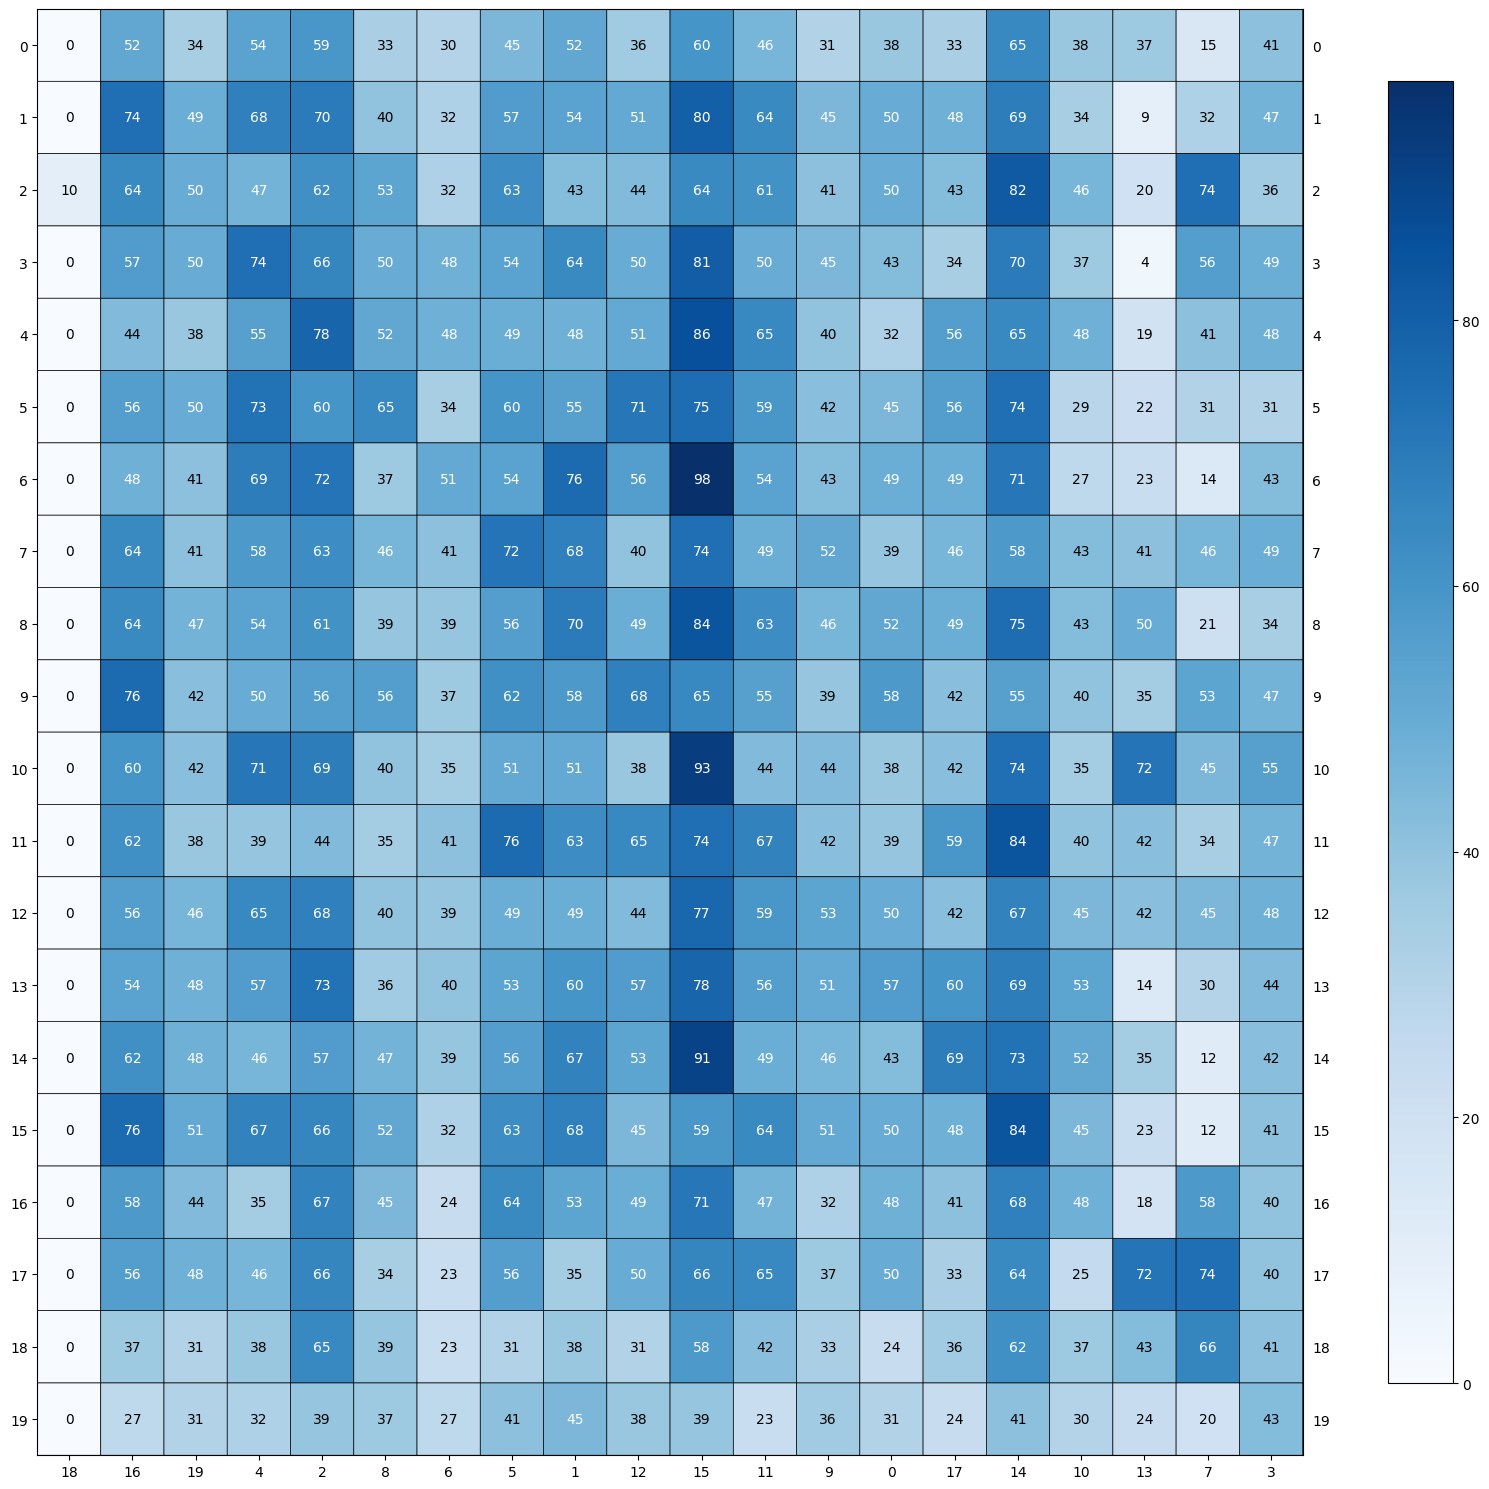

Homogeneity score for all categories using  20  components and  cosine  metrics is:  0.5749235906774
Completeness score for all categories using  20  components and  cosine  metrics is:  0.5975831997171487
V Measure score for all categories using  20  components and  cosine  metrics is:  0.5860344378803356
Adjusted Rand score for all categories using  20  components and  cosine  metrics is:  0.46004028211510756
Adjusted Mutual Info score for all categories using  20  components and  cosine  metrics is:  0.5846681328926362
Contingency Matrix for all categories using  20  components and  cosine  metrics is: 
[[ 24   4   1   1 531   1   1   9  13   0  14   1   8   1   0 178   2   8
    0   2]
 [  0 645   1   2   2  81   2   3   2  78  62  15  18  50   1   3   1   0
    0   7]
 [  0  86   2   4   1 125  12   4   2 515  41   9   8 160   0   1   1   0
   10   4]
 [  0  17   2   3   4 725   2   1   4  88  33  66   5  25   0   1   0   1
    0   5]
 [  1  19   4   1   5 658   4   7   2  41  51 

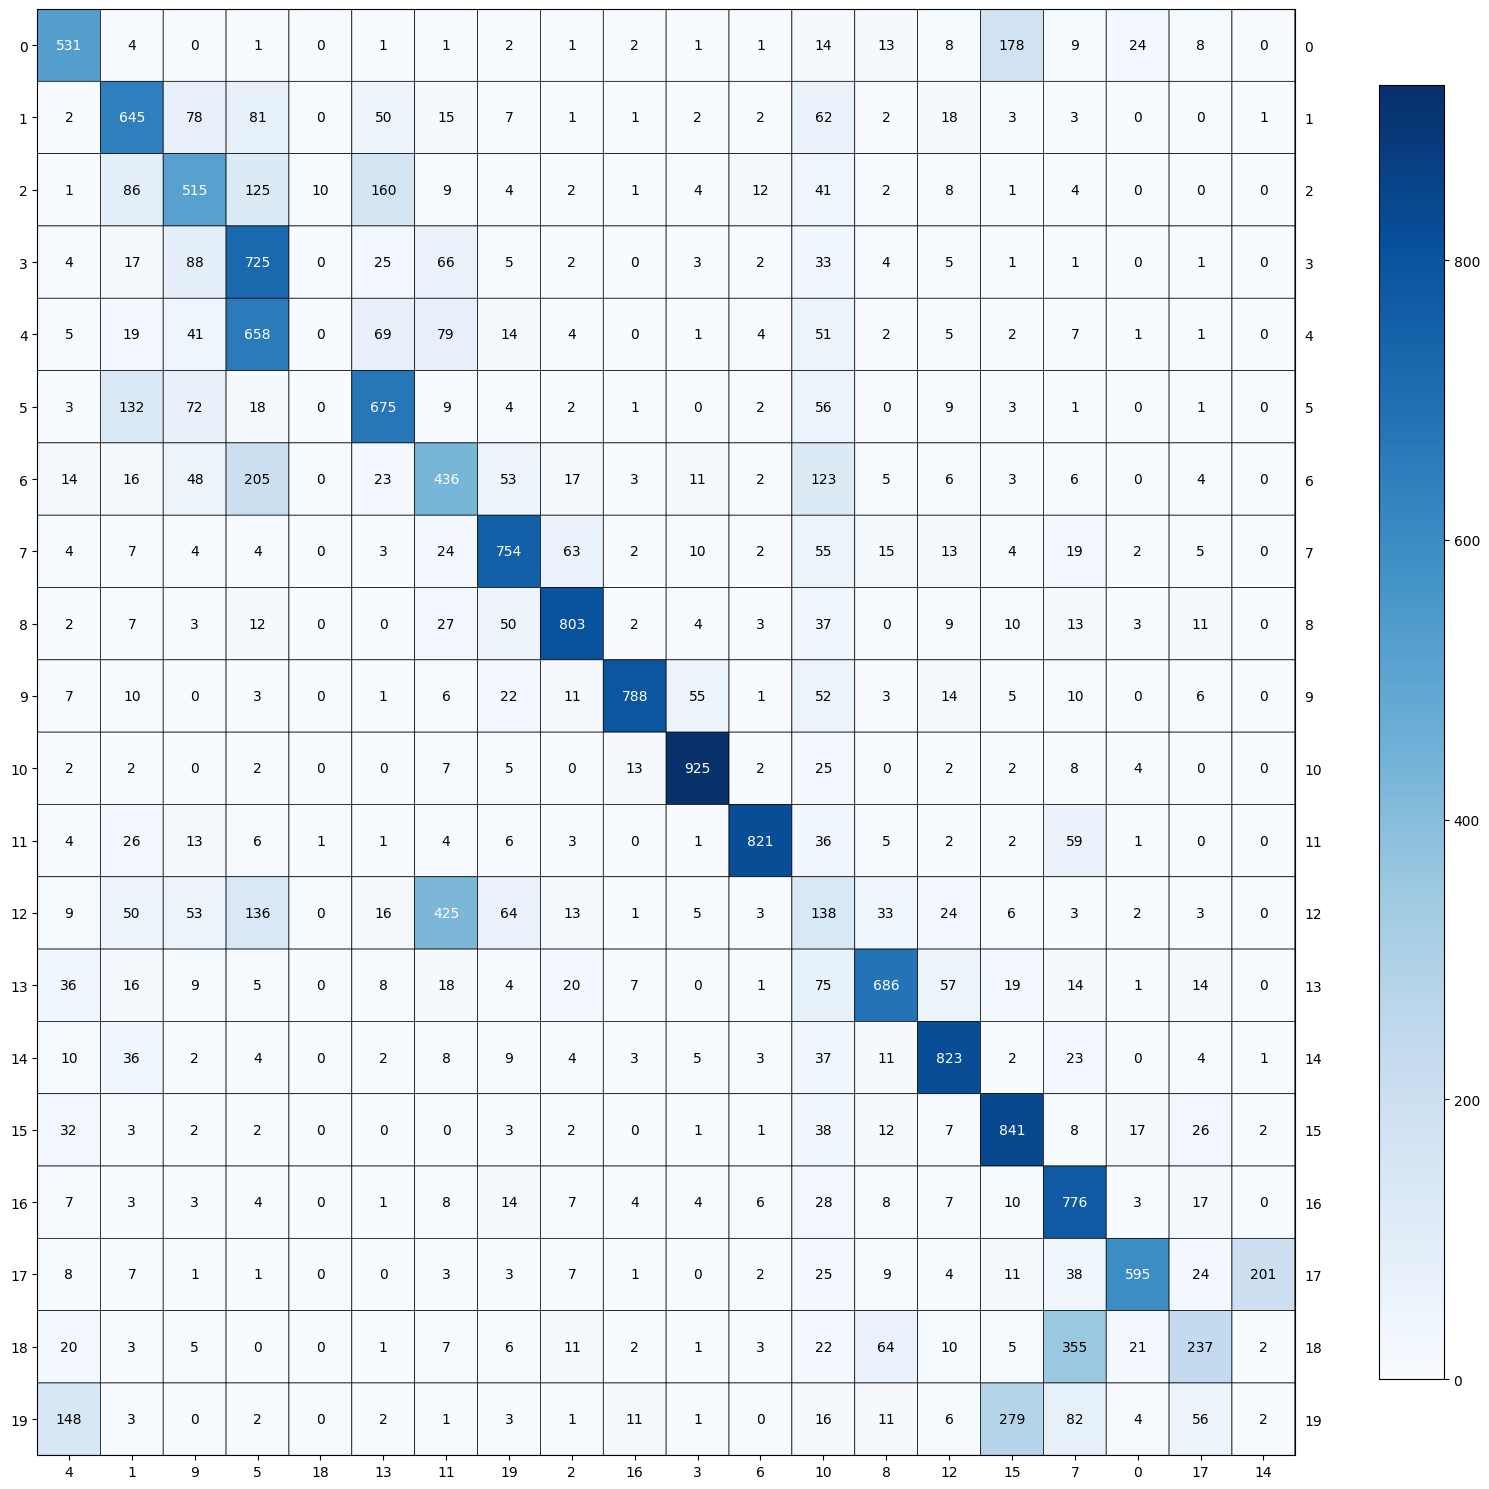

Homogeneity score for all categories using  20  components and  euclidean  metrics is:  0.007837497040642464
Completeness score for all categories using  20  components and  euclidean  metrics is:  0.00813689297772979
V Measure score for all categories using  20  components and  euclidean  metrics is:  0.007984389333130849
Adjusted Rand score for all categories using  20  components and  euclidean  metrics is:  0.001057509315495261
Adjusted Mutual Info score for all categories using  20  components and  euclidean  metrics is:  0.004707589930186415
Contingency Matrix for all categories using  20  components and  euclidean  metrics is: 
[[ 11  54  42  48  48  53  40  34  58  62  43  53  37  48   1  41  46   0
   41  39]
 [ 11  56  57  55  60  63  59  17  77  66  62  84  37  62   0  31  68   0
   57  51]
 [ 53  57  47  58  65  64  38  47  56  59  60  47  46  55   0  51  64  10
   53  55]
 [ 55  56  44  44  61  62  56   8  67  64  55  77  56  65   0  41  55   0
   64  52]
 [ 28  56  53  56

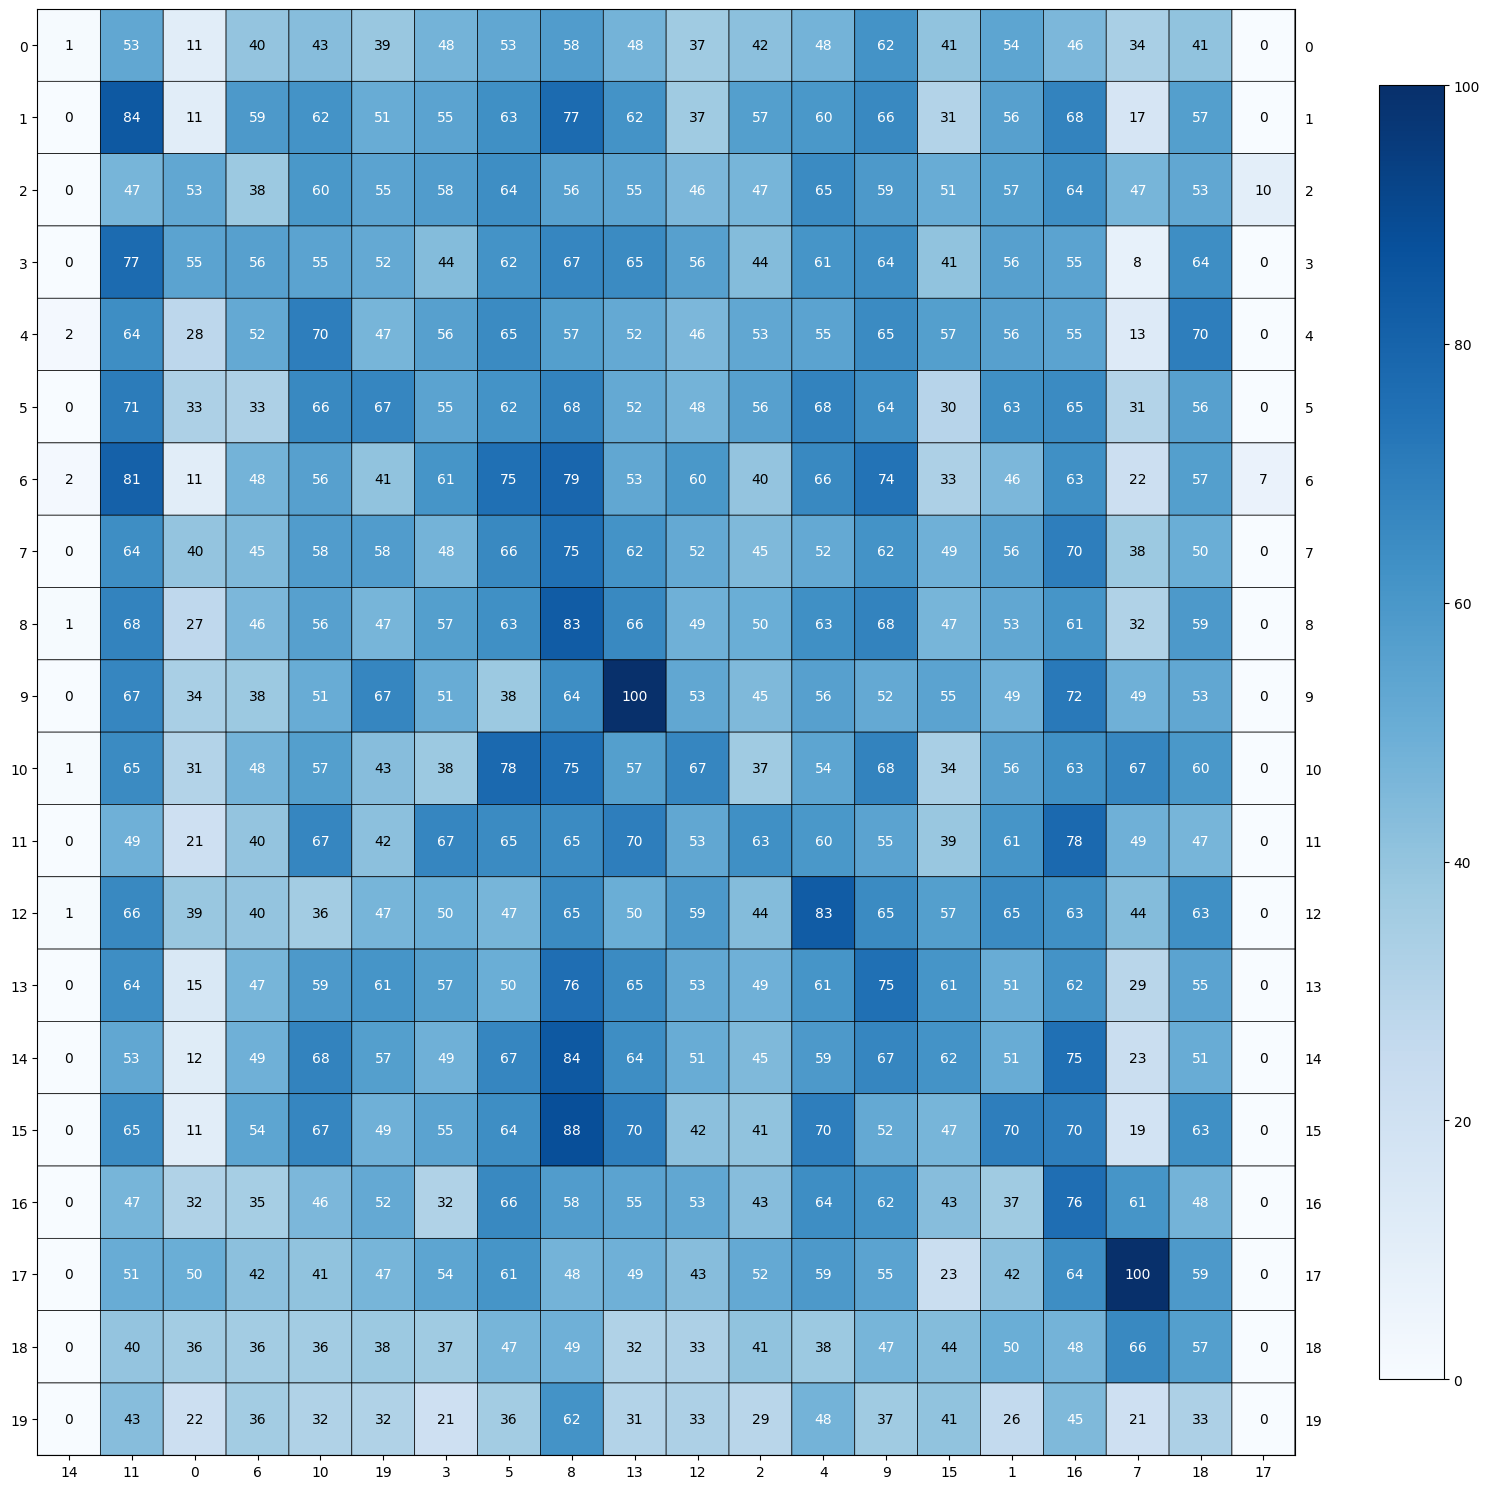

Homogeneity score for all categories using  200  components and  cosine  metrics is:  0.5834080957166907
Completeness score for all categories using  200  components and  cosine  metrics is:  0.6009379272213545
V Measure score for all categories using  200  components and  cosine  metrics is:  0.5920432795382227
Adjusted Rand score for all categories using  200  components and  cosine  metrics is:  0.47377099376076715
Adjusted Mutual Info score for all categories using  200  components and  cosine  metrics is:  0.5906969055771208
Contingency Matrix for all categories using  200  components and  cosine  metrics is: 
[[  7   1   1   5   0   9   6   1   1   8   0 553   1 181   1  11   1   2
    9   1]
 [  2 134   2   1   3  94   5   8   1   1  27   3  74   1   3   2   4 593
   14   1]
 [  1 613   2   2   1  44  10   8  11   1  71   1 113   2   4   0   2  76
   23   0]
 [  2 111   1   2   3  45   9  54   1   3  12   1 717   1   1   0   3  10
    5   1]
 [  3  95   5   4   4  47   6  86   7

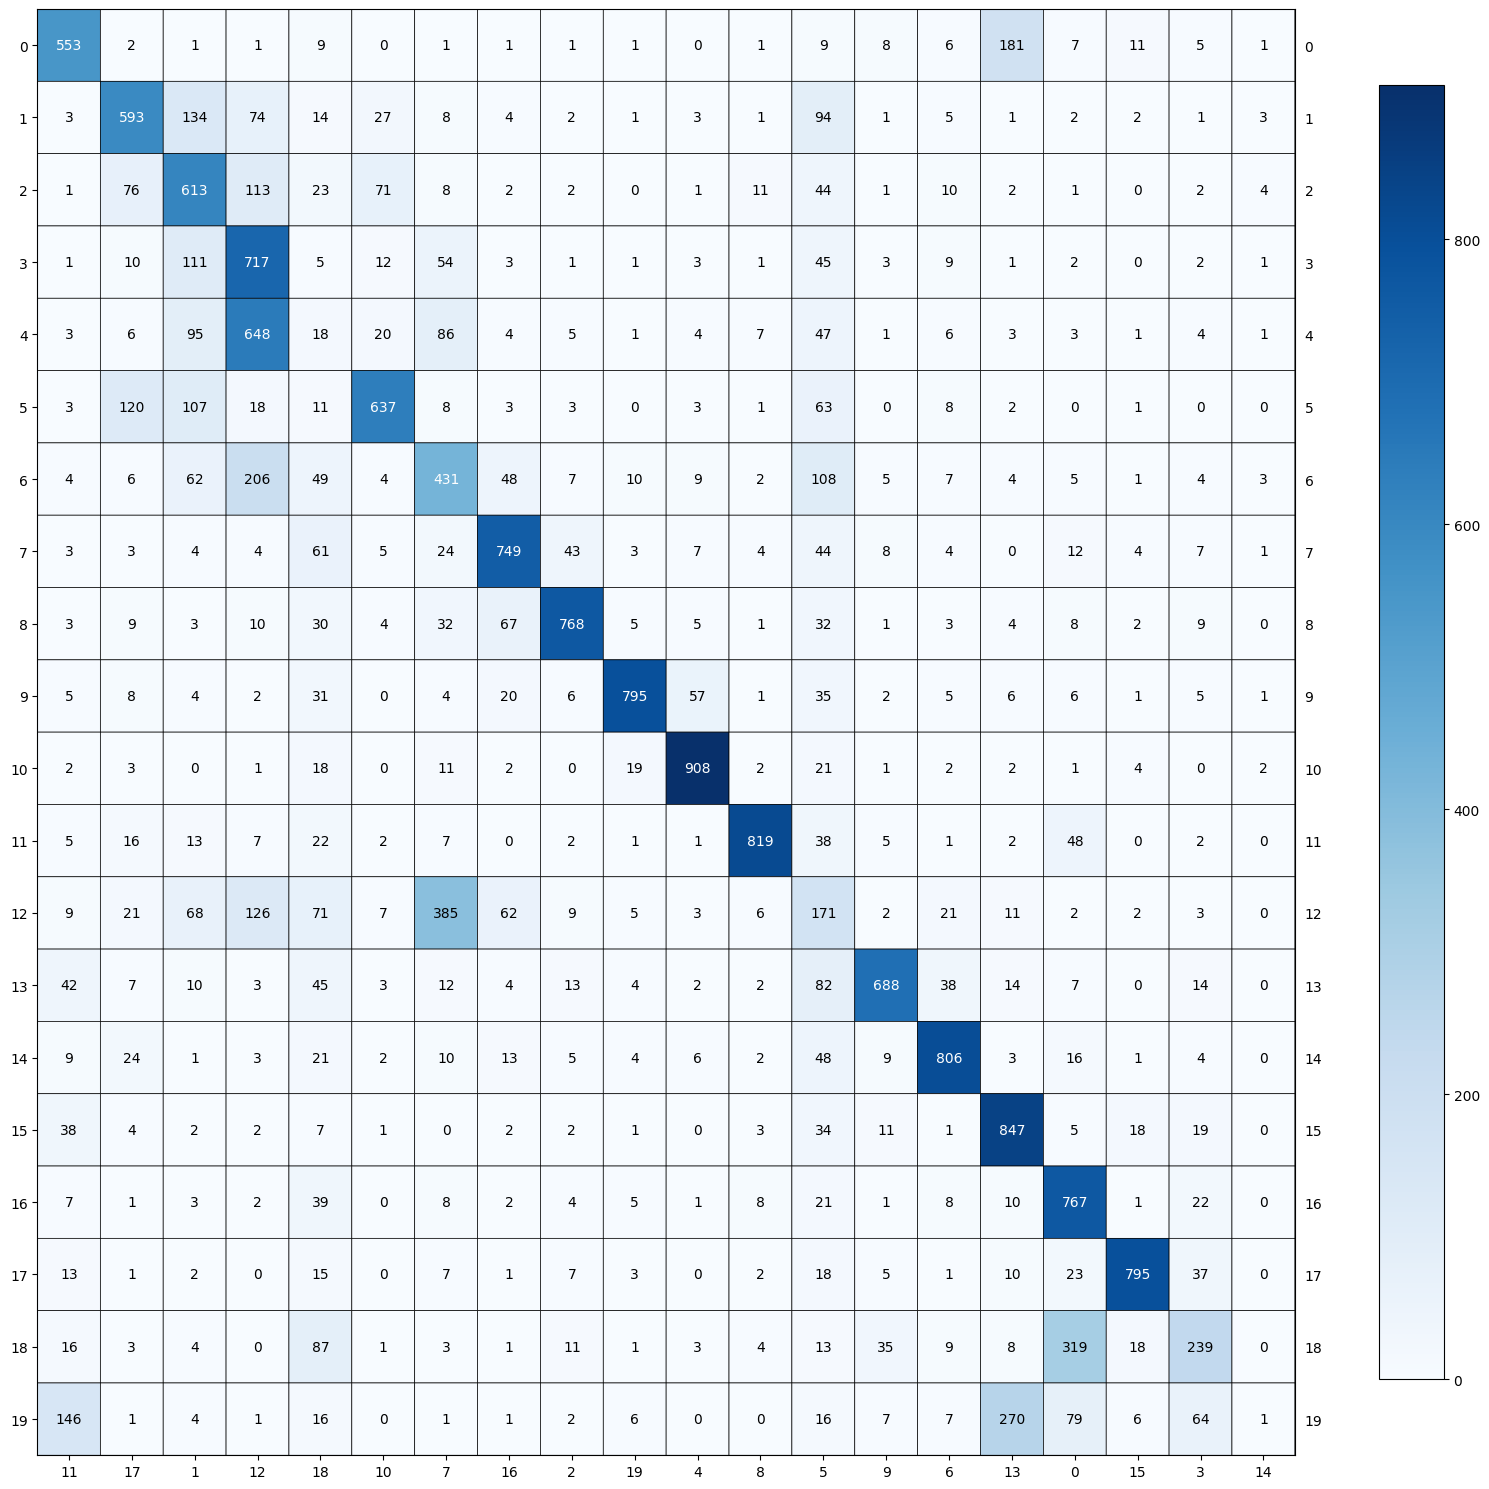

Homogeneity score for all categories using  200  components and  euclidean  metrics is:  0.007532964477482667
Completeness score for all categories using  200  components and  euclidean  metrics is:  0.007836776690624627
V Measure score for all categories using  200  components and  euclidean  metrics is:  0.007681867870480117
Adjusted Rand score for all categories using  200  components and  euclidean  metrics is:  0.001022975641448769
Adjusted Mutual Info score for all categories using  200  components and  euclidean  metrics is:  0.00442812370839427
Contingency Matrix for all categories using  200  components and  euclidean  metrics is: 
[[61 43 51 52 47 37 40 46  0 55 20 35 69 48 67 40 43  1 28 16]
 [79 60 51 72 72 44 43 60  0 59  9 49 67 64 70 47 60  0 43 24]
 [56 52 57 69 48 53 52 74 10 54 43 39 52 59 76 27 47  0 62 55]
 [76 44 63 72 67 46 45 62  0 50  6 34 71 67 62 51 65  0 50 51]
 [56 57 74 71 61 43 54 62  0 40 12 46 81 49 62 37 70  2 50 36]
 [65 72 39 62 70 64 43 70  0 48 18 4

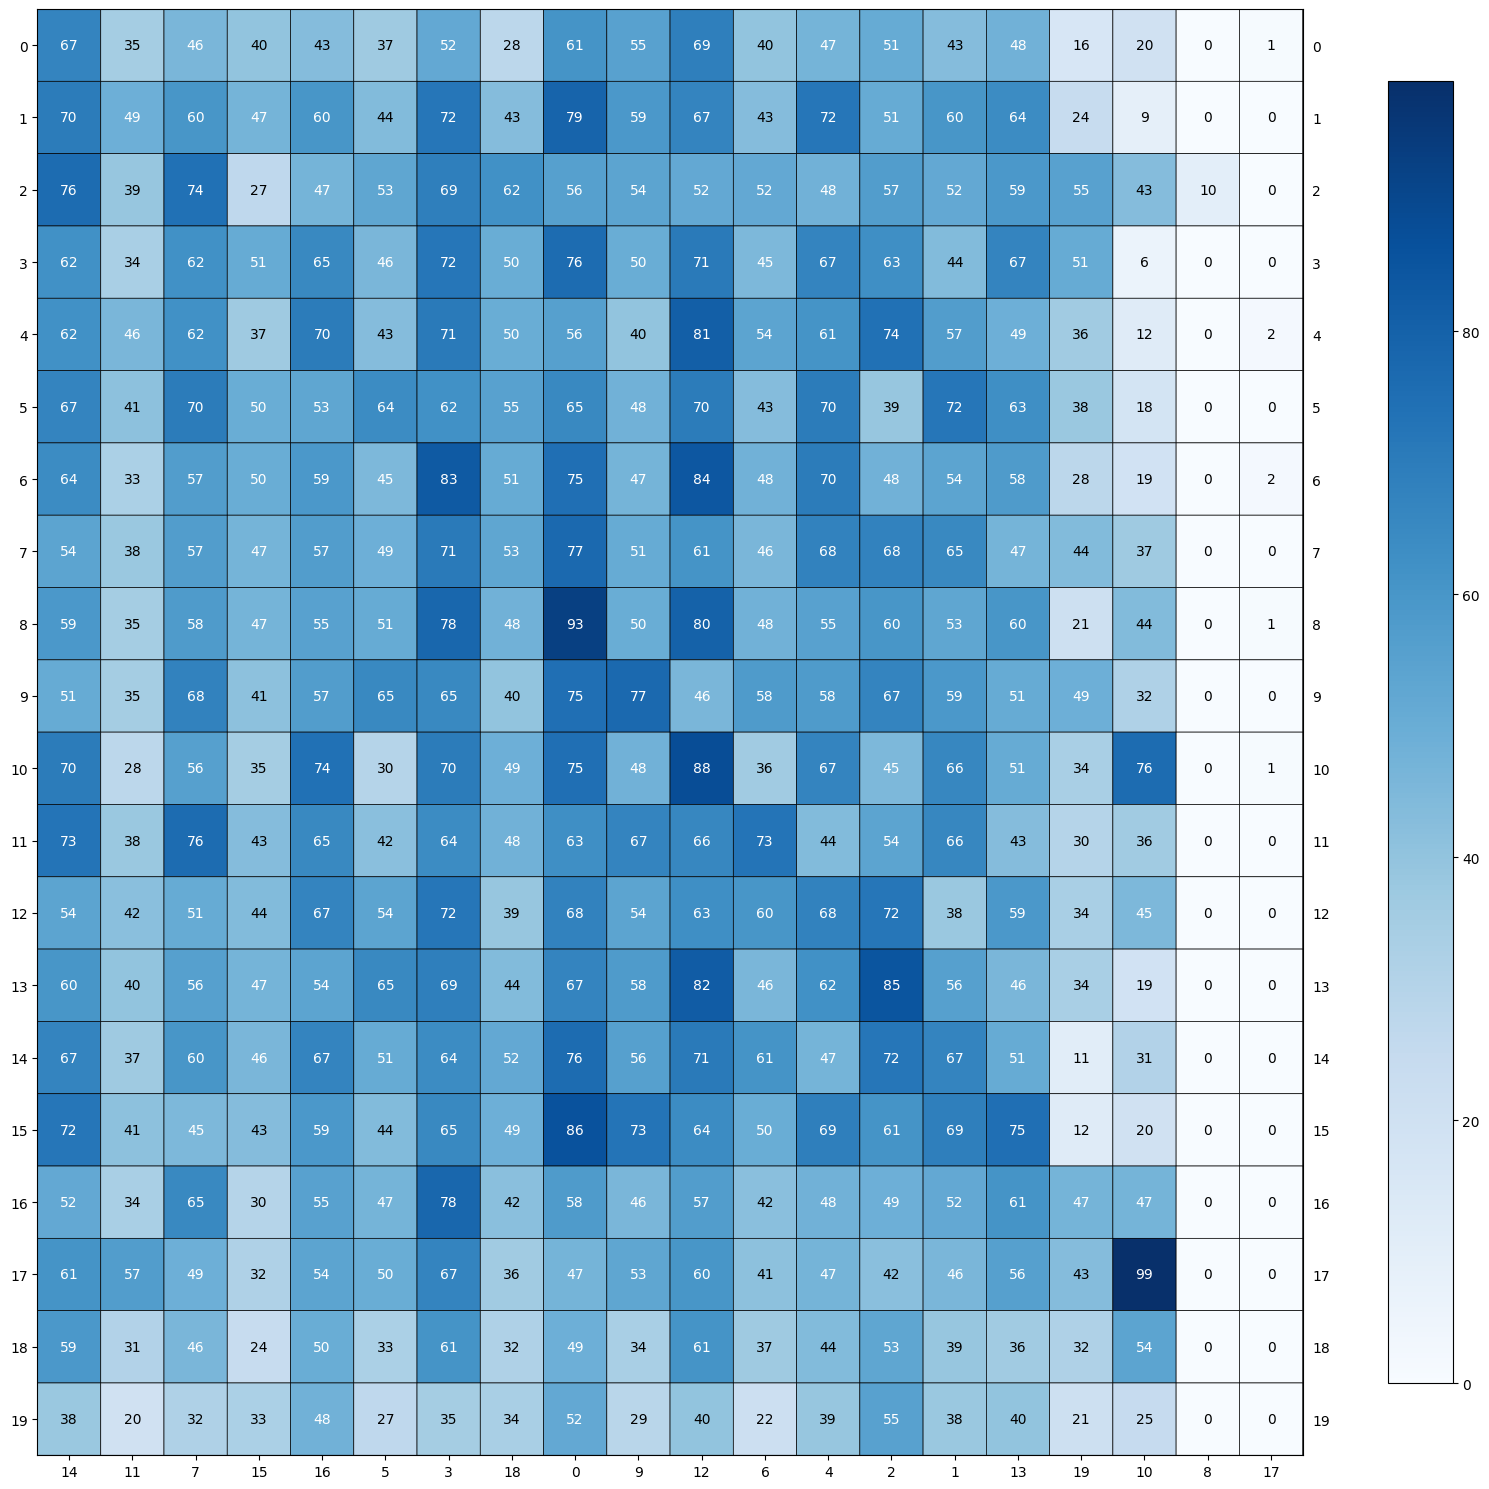

In [ ]:
#Checking for UMAP with cosine and euclidean
n_components = [5, 20, 200]
metrics_required = ["cosine", "euclidean"]
average_metrics_cos =[]
average_metrics_euclidean=[]

# Dimension Reduction with UMAP
for n_comp in n_components:
    for metric in metrics_required:
        reducer = umap.UMAP(n_components=n_comp, metric=metric)
        embedding = reducer.fit_transform(X_tfidf_all_categories)
        umap_kmeans_all_categories = kmeans_all_categories.fit_predict(embedding)
        metrics_values=[]
        umap_all_categories_homogeneity_score = homogeneity_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
        metrics_values.append(umap_all_categories_homogeneity_score)
        umap_all_categories_completeness_score = completeness_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
        metrics_values.append(umap_all_categories_completeness_score)
        umap_all_categories_v_measure_score = v_measure_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
        metrics_values.append(umap_all_categories_v_measure_score)
        umap_all_categories_adjusted_rand_score = adjusted_rand_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
        metrics_values.append(umap_all_categories_adjusted_rand_score)
        umap_all_categories_adjusted_mutual_info_score = adjusted_mutual_info_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
        metrics_values.append(umap_all_categories_adjusted_mutual_info_score)
        if metric == "cosine":
          average_metrics_cos.append(sum(metrics_values)/5)
        else:
          average_metrics_euclidean.append(sum(metrics_values)/5)
        contingencyMatrix_all_categories_umap = metrics.cluster.contingency_matrix(newsgroups_all_categories.target, umap_kmeans_all_categories)
        print("Homogeneity score for all categories using ", n_comp, " components and ", metric, " metrics is: ", umap_all_categories_homogeneity_score)
        print("Completeness score for all categories using ", n_comp, " components and ", metric, " metrics is: ", umap_all_categories_completeness_score)
        print("V Measure score for all categories using ", n_comp, " components and ", metric, " metrics is: ", umap_all_categories_v_measure_score)
        print("Adjusted Rand score for all categories using ", n_comp, " components and ", metric, " metrics is: ", umap_all_categories_adjusted_rand_score)
        print("Adjusted Mutual Info score for all categories using ", n_comp, " components and ", metric, " metrics is: ", umap_all_categories_adjusted_mutual_info_score)
        print("Contingency Matrix for all categories using ", n_comp, " components and ", metric, " metrics is: ")
        print(contingencyMatrix_all_categories_umap)
        #Plotting the contingency matrix
        rows_umap, cols_umap = linear_sum_assignment(contingencyMatrix_all_categories_umap, maximize=True)
        plot_mat(contingencyMatrix_all_categories_umap[rows_umap[:, np.newaxis], cols_umap], xticklabels=cols_umap, yticklabels=rows_umap, size=(15,15))

In [ ]:
#Finding the best values for euclidean and for cosine
best_r_euc = n_components[average_metrics_euclidean.index(max(average_metrics_euclidean))]
print('Best value of r for Euclidean UMAP (according to avg. metric): ', best_r_euc, ', avg. value of 5 metrics: ',max(average_metrics_euclidean))
best_r_cos = n_components[average_metrics_cos.index(max(average_metrics_cos))]
print('Best value of r for Cosine UMAP (according to avg. metric): ', best_r_cos, ', avg. value of 5 metrics: ',max(average_metrics_cos))

Best value of r for Euclidean UMAP (according to avg. metric):  5 , avg. value of 5 metrics:  0.005954110739526682
Best value of r for Cosine UMAP (according to avg. metric):  200 , avg. value of 5 metrics:  0.5681714403628312


QUESTION 11: Reduce the dimension of your dataset with UMAP. Consider the following settings: n components = [5, 20, 200], metric = ”cosine” vs. ”euclidean”. If ”cosine” metric fails, please look at the FAQ at the end of this spec.

Report the permuted contingency matrix and the five clustering evaluation metrics for the different combinations (6 combinations).

>5 components and cosine metric:\
Homogeneity score for all categories using  5  components and  cosine  metrics is:  0.5531525085510313\
Completeness score for all categories using  5  components and  cosine  metrics is:  0.5829782139137853\
V Measure score for all categories using  5  components and  cosine  metrics is:  0.5676738690023347\
Adjusted Rand score for all categories using  5  components and  cosine  metrics is:  0.42998284859282154\
Adjusted Mutual Info score for all categories using  5  components and  cosine  metrics is:  0.5662283570153432\
The contingency matrix can be found above.

>5 components and euclidean metric:\
Homogeneity score for all categories using  5  components and  euclidean  metrics is:  0.007891363023388595\
Completeness score for all categories using  5  components and  euclidean  metrics is:  0.008069457254962472\
V Measure score for all categories using  5  components and  euclidean  metrics is:  0.007979416532494715\
Adjusted Rand score for all categories using  5  components and  euclidean  metrics is:  0.0010915638250219436\
Adjusted Mutual Info score for all categories using  5  components and  euclidean  metrics is:  0.004738753061765688\
The contingency matrix can be found above.

>20 components and cosine metric:\
Homogeneity score for all categories using  20  components and  cosine  metrics is:  0.5749235906774\
Completeness score for all categories using  20  components and  cosine  metrics is:  0.5975831997171487\
V Measure score for all categories using  20  components and  cosine  metrics is:  0.5860344378803356\
Adjusted Rand score for all categories using  20  components and  cosine  metrics is:  0.46004028211510756\
Adjusted Mutual Info score for all categories using  20  components and  cosine  metrics is:  0.5846681328926362\
The contingency matrix can be found above.

>20 components and euclidean metric:\
Homogeneity score for all categories using  20  components and  euclidean  metrics is:  0.007837497040642464\
Completeness score for all categories using  20  components and  euclidean  metrics is:  0.00813689297772979\
V Measure score for all categories using  20  components and  euclidean  metrics is:  0.007984389333130849\
Adjusted Rand score for all categories using  20  components and  euclidean  metrics is:  0.001057509315495261\
Adjusted Mutual Info score for all categories using  20  components and  euclidean  metrics is:  0.004707589930186415\
The contingency matrix can be found above.

>200 components and cosine metric:\
Homogeneity score for all categories using  200  components and  cosine  metrics is:  0.5834080957166907\
Completeness score for all categories using  200  components and  cosine  metrics is:  0.6009379272213545\
V Measure score for all categories using  200  components and  cosine  metrics is:  0.5920432795382227\
Adjusted Rand score for all categories using  200  components and  cosine  metrics is:  0.47377099376076715\
Adjusted Mutual Info score for all categories using  200  components and  cosine  metrics is:  0.5906969055771208\
The contingency matrix can be found above.

>200 components and euclidean metric:\
Homogeneity score for all categories using  200  components and  euclidean  metrics is:  0.007532964477482667\
Completeness score for all categories using  200  components and  euclidean  metrics is:  0.007836776690624627\
V Measure score for all categories using  200  components and  euclidean  metrics is:  0.007681867870480117\
Adjusted Rand score for all categories using  200  components and  euclidean  metrics is:  0.001022975641448769\
Adjusted Mutual Info score for all categories using  200  components and  euclidean  metrics is:  0.00442812370839427\
The contingency matrix can be found above.

>Best value of r for Euclidean UMAP (according to avg. metric):  5 , avg. value of 5 metrics:  0.005954110739526682\
Best value of r for Cosine UMAP (according to avg. metric):  200 , avg. value of 5 metrics:  0.5681714403628312


# **Question 12**

QUESTION 12: Analyze the contingency matrices. Which setting works best and why? What about for each metric choice?

>We can see that for Euclidean UMAP, the contingency matrix is non diagonal and spread out. Whereas for cosine UMAP, some of the ground truth clusters are being mapped to a single cluster and we have a diagonal. In general we can see that the cosine with different components is performing way better than euclidean as a metric. Cosine has a diagonal which means most of the clusters are mapped properly whereas this is not the case for euclidean.

>We see that for cosine the best values are found for r=200.\
Homogeneity score for all categories using  200  components and  cosine  metrics is:  0.5834080957166907\
Completeness score for all categories using  200  components and  cosine  metrics is:  0.6009379272213545\
V Measure score for all categories using  200  components and  cosine  metrics is:  0.5920432795382227\
Adjusted Rand score for all categories using  200  components and  cosine  metrics is:  0.47377099376076715\
Adjusted Mutual Info score for all categories using  200  components and  cosine  metrics is:  0.5906969055771208\
The contingency matrix for the same can be found above.

>We can see that for euclidean the best value is found for r=5.\
Homogeneity score for all categories using  5  components and  euclidean  metrics is:  0.007891363023388595\
Completeness score for all categories using  5  components and  euclidean  metrics is:  0.008069457254962472\
V Measure score for all categories using  5  components and  euclidean  metrics is:  0.007979416532494715\
Adjusted Rand score for all categories using  5  components and  euclidean  metrics is:  0.0010915638250219436\
Adjusted Mutual Info score for all categories using  5  components and  euclidean  metrics is:  0.004738753061765688\
The contingency matrix for the same can be found above.

>Comparing both euclidean and cosine, we see that the best metrics are found for r=200 using cosine with an average of the 5 metrics as 0.5681714403628312.

# **Question 13**

QUESTION 13: So far, we have attempted K-Means clustering with 4 different representation learning techniques (sparse TF-IDF representation, PCA-reduced, NMF-reduced, UMAP-reduced). Compare and contrast the clustering results across the 4 choices, and suggest an approach that is best for the K-Means clustering task on the 20-class text data. Choose any choice of clustering metrics for your comparison.

>The best results for each of the representation learning techniques are as below:

>Sparse TF-IDF:\
Homogeneity: 0.327942\
Completeness: 0.375275\
V-measure: 0.350016\
Adjusted Rand-Index: 0.116144\
Adjusted Mutual Information Score: 0.347767

>SVD: best value of r = 100\
Homogeneity score for all categories using SVD is:  0.3307545340133053\
Completeness score for all categories using SVD is:  0.39998464796440997\
V Measure score for all categories using SVD is:  0.3620901659929847\
Adjusted Rand score for all categories using SVD is:  0.1113858195844356\
Adjusted Mutual Info score for all categories using SVD is:  0.35981949061273566

>NMF: best value of r = 9\
Homogeneity score for all categories using NMF is:  0.29248781037820104\
Completeness score for all categories using NMF is:  0.3331444910454053\
V Measure score for all categories using NMF is:  0.3114951146342911\
Adjusted Rand score for all categories using NMF is:  0.0997830764438181\
Adjusted Mutual Info score for all categories using NMF is:  0.30911458698852257

>UMAP: best value of r = 200 with cosine\
Homogeneity score for all categories using  200  components and  cosine  metrics is:  0.5834080957166907\
Completeness score for all categories using  200  components and  cosine  metrics is:  0.6009379272213545\
V Measure score for all categories using  200  components and  cosine  metrics is:  0.5920432795382227\
Adjusted Rand score for all categories using  200  components and  cosine  metrics is:  0.47377099376076715\
Adjusted Mutual Info score for all categories using  200  components and  cosine  metrics is:  0.5906969055771208

>From the above results, we can see that UMAP with cosine and value of r=200 has the best metrics as compared to the other 3. This may be possible since UMAP preserves both local and global structure of the data. It can hence capture all types of relationships. It is also capable of identifying non linear relationships of the data. UMAP constructs a graphical representation of the data. Whereas SVD and NMF use linear relationships of the data. We also see that UMAP for cosine performs better than UMAP for euclidean. This is because the cosine distance is not affected by the magnitude of the vectors. It associates clusters based on the angle between the sample points. Hence UMAP performs the best from the 4 representation learning techniques.


# **Question 14**

In [ ]:
# Step 1: Dimension Reduction with UMAP
reducer = umap.UMAP(n_components=20,metric='cosine')
embedding = reducer.fit_transform(X_tfidf_all_categories)

# Step 2: Agglomerative Clustering with "ward" linkage
agg_clustering_ward = AgglomerativeClustering(n_clusters=20, linkage='ward')
cluster_labels_ward = agg_clustering_ward.fit_predict(embedding)
agg_clustering_ward_all_categories_homogeneity_score = homogeneity_score(newsgroups_all_categories.target, cluster_labels_ward)
agg_clustering_ward_all_categories_completeness_score = completeness_score(newsgroups_all_categories.target, cluster_labels_ward)
agg_clustering_ward_all_categories_v_measure_score = v_measure_score(newsgroups_all_categories.target, cluster_labels_ward)
agg_clustering_ward_all_categories_adjusted_rand_score = adjusted_rand_score(newsgroups_all_categories.target, cluster_labels_ward)
agg_clustering_ward_all_categories_adjusted_mutual_info_score = adjusted_mutual_info_score(newsgroups_all_categories.target, cluster_labels_ward)
print("Homogeneity score for all categories using agglomerative clustering with ward linkage is: ", agg_clustering_ward_all_categories_homogeneity_score)
print("Completeness score for all categories using agglomerative clustering with ward linkage is: ", agg_clustering_ward_all_categories_completeness_score)
print("V Measure score for all categories using agglomerative clustering with ward linkage is: ", agg_clustering_ward_all_categories_v_measure_score)
print("Adjusted Rand score for all categories using agglomerative clustering with ward linkage is: ", agg_clustering_ward_all_categories_adjusted_rand_score)
print("Adjusted Mutual Info score for all categories using agglomerative clustering with ward linkage is: ", agg_clustering_ward_all_categories_adjusted_mutual_info_score)

# Step 3: Agglomerative Clustering with "single" linkage
agg_clustering_single = AgglomerativeClustering(n_clusters=20, linkage='single')
cluster_labels_single = agg_clustering_single.fit_predict(embedding)
agg_clustering_single_all_categories_homogeneity_score = homogeneity_score(newsgroups_all_categories.target, cluster_labels_single)
agg_clustering_single_all_categories_completeness_score = completeness_score(newsgroups_all_categories.target, cluster_labels_single)
agg_clustering_single_all_categories_v_measure_score = v_measure_score(newsgroups_all_categories.target, cluster_labels_single)
agg_clustering_single_all_categories_adjusted_rand_score = adjusted_rand_score(newsgroups_all_categories.target, cluster_labels_single)
agg_clustering_single_all_categories_adjusted_mutual_info_score = adjusted_mutual_info_score(newsgroups_all_categories.target, cluster_labels_single)
print("Homogeneity score for all categories using agglomerative clustering with single linkage is: ", agg_clustering_single_all_categories_homogeneity_score)
print("Completeness score for all categories using agglomerative clustering with single linkage is: ", agg_clustering_single_all_categories_completeness_score)
print("V Measure score for all categories using agglomerative clustering with single linkage is: ", agg_clustering_single_all_categories_v_measure_score)
print("Adjusted Rand score for all categories using agglomerative clustering with single linkage is: ", agg_clustering_single_all_categories_adjusted_rand_score)
print("Adjusted Mutual Info score for all categories using agglomerative clustering with single linkage is: ", agg_clustering_single_all_categories_adjusted_mutual_info_score)

Homogeneity score for all categories using agglomerative clustering with ward linkage is:  0.5540433824883455
Completeness score for all categories using agglomerative clustering with ward linkage is:  0.5942823738231402
V Measure score for all categories using agglomerative clustering with ward linkage is:  0.5734578619986366
Adjusted Rand score for all categories using agglomerative clustering with ward linkage is:  0.41694193019004505
Adjusted Mutual Info score for all categories using agglomerative clustering with ward linkage is:  0.5720177280839943
Homogeneity score for all categories using agglomerative clustering with single linkage is:  0.018333549944148025
Completeness score for all categories using agglomerative clustering with single linkage is:  0.3830029417337657
V Measure score for all categories using agglomerative clustering with single linkage is:  0.03499210117512487
Adjusted Rand score for all categories using agglomerative clustering with single linkage is:  0.0005

QUESTION 14: Use UMAP to reduce the dimensionality properly, and perform Agglom- erative clustering with n_clusters=20 . Compare the performance of “ward” and “single” linkage criteria.

Report the five clustering evaluation metrics for each case.

>Agglomerative Clustering with ward linkage:\
Homogeneity score for all categories using agglomerative clustering with ward linkage is:  0.5540433824883455\
Completeness score for all categories using agglomerative clustering with ward linkage is:  0.5942823738231402\
V Measure score for all categories using agglomerative clustering with ward linkage is:  0.5734578619986366\
Adjusted Rand score for all categories using agglomerative clustering with ward linkage is:  0.41694193019004505\
Adjusted Mutual Info score for all categories using agglomerative clustering with ward linkage is:  0.5720177280839943

>Agglomerative Clustering with single linkage:\
Homogeneity score for all categories using agglomerative clustering with single linkage is:  0.018333549944148025\
Completeness score for all categories using agglomerative clustering with single linkage is:  0.3830029417337657\
V Measure score for all categories using agglomerative clustering with single linkage is:  0.03499210117512487\
Adjusted Rand score for all categories using agglomerative clustering with single linkage is:  0.0005218260367308564\
Adjusted Mutual Info score for all categories using agglomerative clustering with single linkage is:  0.02968964336597013

>We can see that ward linkage performs much better than single linkage. This might be because single linkage uses the nearest neighbor concept whereas ward linkage uses minimum increase in sum of squares. Single linkage is fast but it does not work well when we have outliers. Single linkage forms long chain like structures whereas ward linkage forms spherical blobs. This is why ward linkage is better.


# **Question 15**

In [ ]:
reducer = umap.UMAP(n_components=20,metric='cosine')
embedding = reducer.fit_transform(X_tfidf_all_categories)

#Apply HDBSCAN with varying min_cluster_size
min_cluster_sizes = [20, 100, 200]
eps = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0,50.0]
evaluation_metrics = ['adjusted_rand_score', 'adjusted_mutual_info_score', 'homogeneity_score', 'completeness_score', 'v_measure_score']

for min_cluster_size in min_cluster_sizes:
  for ep in eps:
    # Apply HDBSCAN
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,cluster_selection_epsilon=ep)
    cluster_labels = clusterer.fit_predict(embedding)
    metric_sum=0
    # Evaluate clustering performance
    print(f"\nEvaluation metrics for min_cluster_size={min_cluster_size} and epsilon={ep}:")
    for metric_name in evaluation_metrics:
        metric_func = getattr(metrics, metric_name)
        score = metric_func(newsgroups_all_categories.target, cluster_labels)
        metric_sum+=score
        print(f"{metric_name}: {score}")
    print("Average metric score: ", metric_sum/5)



Evaluation metrics for min_cluster_size=20 and epsilon=0.01:
adjusted_rand_score: 0.09174779131861024
adjusted_mutual_info_score: 0.4363027167527094
homogeneity_score: 0.448088918768333
completeness_score: 0.44893000569391533
v_measure_score: 0.44850906790989126
Average metric score:  0.37471570008869187

Evaluation metrics for min_cluster_size=20 and epsilon=0.1:
adjusted_rand_score: 0.09174779131861024
adjusted_mutual_info_score: 0.4363027167527094
homogeneity_score: 0.448088918768333
completeness_score: 0.44893000569391533
v_measure_score: 0.44850906790989126
Average metric score:  0.37471570008869187

Evaluation metrics for min_cluster_size=20 and epsilon=0.5:
adjusted_rand_score: 0.23190685436147102
adjusted_mutual_info_score: 0.487065021093364
homogeneity_score: 0.4121838885615617
completeness_score: 0.6026334336412247
v_measure_score: 0.48953794268365874
Average metric score:  0.44466542806825604

Evaluation metrics for min_cluster_size=20 and epsilon=1.0:
adjusted_rand_score: 

QUESTION 15: Apply HDBSCAN on UMAP-transformed 20-category data.
Use min_cluster_size=100.
Vary the min cluster size among 20, 100, 200 and report your findings in terms of the five clustering evaluation metrics - you will plot the best contingency matrix in the next question. Feel free to try modifying other parameters in HDBSCAN to get better performance.

>I have varied the value of epsilon and checked which performs the best for each of the minimum cluster sizes mentioned.

>Evaluation metrics for min_cluster_size=20 and epsilon=0.5:\
adjusted_rand_score: 0.23190685436147102\
adjusted_mutual_info_score: 0.487065021093364\
homogeneity_score: 0.4121838885615617\
completeness_score: 0.6026334336412247\
v_measure_score: 0.48953794268365874\
Average metric score:  0.44466542806825604

>Evaluation metrics for min_cluster_size=100 and epsilon=0.5:\
adjusted_rand_score: 0.20526952868326936\
adjusted_mutual_info_score: 0.4963771355150677\
homogeneity_score: 0.41889434318913665\
completeness_score: 0.6124023418409557\
v_measure_score: 0.4974938453243857\
Average metric score:  0.446087438910563

>Evaluation metrics for min_cluster_size=200 and epsilon=0.1:\
adjusted_rand_score: 0.21126361563018553\
adjusted_mutual_info_score: 0.4907849089323803\
homogeneity_score: 0.41343356969541817\
completeness_score: 0.6068582226082836\
v_measure_score: 0.49181138800590757\
Average metric score:  0.442830340974435

>We notice that the best clustering model is for minimum cluster size = 100 and epsilon = 0.5.


# **Question 16**

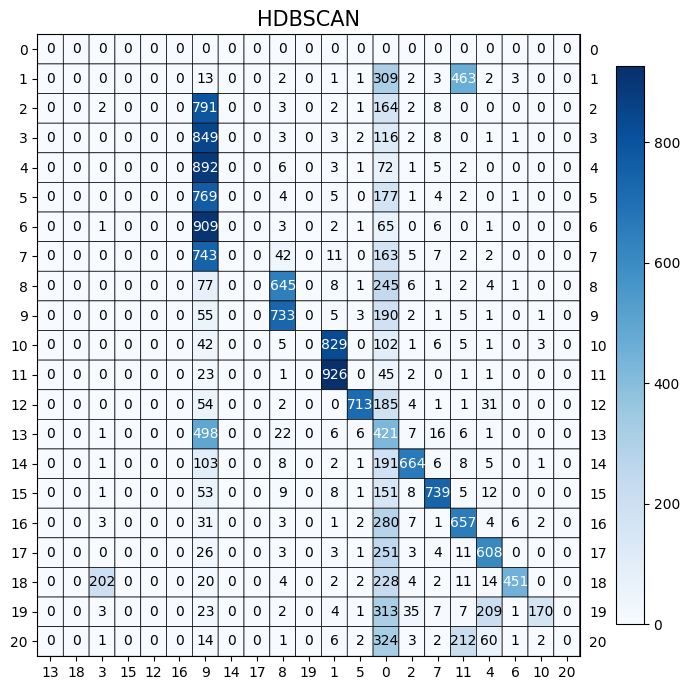

In [ ]:
#Plotting the contingency matrix for hdbscan with the best min_cluster_size and cluster_selection_epsilon
cluster_labels = hdbscan.HDBSCAN(min_cluster_size=100,cluster_selection_epsilon=0.1,core_dist_n_jobs=-1).fit_predict(embedding)
cm = confusion_matrix(newsgroups_all_categories.target, cluster_labels)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'HDBSCAN')

In [ ]:
#Finding the number of clusters formed
num_clusters = len(np.unique(cluster_labels))
num_clusters

12

QUESTION 16: Contingency matrix
Plot the contingency matrix for the best clustering model from Question 15.
How many clusters are given by the model? What does “-1” mean for the clustering labels? Interpret the contingency matrix considering the answer to these questions.

> The contingency matrix can be found above. We notice that the best clustering model is for minimum cluster size = 100 and epsilon = 0.5. We can see that hdbscan forms 12 clusters and it forms a -1 cluster. We can see that hdbscan forms a lesser number of clusters than the actual categories that we have. This is because it does not take the number of clusters as an input. Instead, it forms clusters on the basis of the density of the feature vectors. -1 signifies all the outliers. The sensitivity to the density of determining the clusters depends on the hyperparameters like epsilon as seen above.

# **Question 17**

In [ ]:
#Finding the average of the 5 metrics for all the given combinations
score=[]
dim_reduction= [
                TruncatedSVD(n_components=5, random_state=0),
                TruncatedSVD(n_components=20, random_state=0),
                TruncatedSVD(n_components=200, random_state=0),
                NMF(n_components=5, random_state=0, max_iter=200),
                NMF(n_components=20, random_state=0, max_iter=200),
                NMF(n_components=200, random_state=0, max_iter=200),
                umap.UMAP(n_components=5,metric='cosine'),
                umap.UMAP(n_components=20,metric='cosine'),
                umap.UMAP(n_components=200,metric='cosine')
                ]

clustering = [KMeans(n_clusters=10, max_iter=1000, n_init=30, random_state=0),
              KMeans(n_clusters=20, max_iter=1000, n_init=30, random_state=0),
              KMeans(n_clusters=50, max_iter=1000, n_init=30, random_state=0),
              AgglomerativeClustering(n_clusters=20, linkage='ward'),
              hdbscan.HDBSCAN(min_cluster_size=100,cluster_selection_epsilon=0.5),
              hdbscan.HDBSCAN(min_cluster_size=200,cluster_selection_epsilon=0.5)
]

for dim_red in dim_reduction:
  dim_reduced_df10_train= dim_red.fit_transform(X_tfidf_all_categories)
  for cluster in clustering :
    # perform clustering
    prediction = cluster.fit_predict(dim_reduced_df10_train)

    pred_homogeneity_score_value = homogeneity_score(newsgroups_all_categories.target, prediction)
    pred_completeness_score_value = completeness_score(newsgroups_all_categories.target, prediction)
    pred_v_measure_score_value = v_measure_score(newsgroups_all_categories.target, prediction)
    pred_adjusted_rand_score_value = adjusted_rand_score(newsgroups_all_categories.target, prediction)
    pred_adjusted_mutual_info_score_value = adjusted_mutual_info_score(newsgroups_all_categories.target, prediction)
    avg_score = (pred_homogeneity_score_value+pred_completeness_score_value+pred_v_measure_score_value+pred_adjusted_rand_score_value+pred_adjusted_mutual_info_score_value)/5

    print(dim_red, cluster, avg_score)
    score.append([dim_red, cluster, avg_score])

TruncatedSVD(n_components=5, random_state=0) KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0) 0.28826121545814104
TruncatedSVD(n_components=5, random_state=0) KMeans(max_iter=1000, n_clusters=20, n_init=30, random_state=0) 0.2918915174997078
TruncatedSVD(n_components=5, random_state=0) KMeans(max_iter=1000, n_clusters=50, n_init=30, random_state=0) 0.2828190172917353
TruncatedSVD(n_components=5, random_state=0) AgglomerativeClustering(n_clusters=20) 0.28175825239625946
TruncatedSVD(n_components=5, random_state=0) HDBSCAN(cluster_selection_epsilon=0.5, min_cluster_size=100) 0.2
TruncatedSVD(n_components=5, random_state=0) HDBSCAN(cluster_selection_epsilon=0.5, min_cluster_size=200) 0.2
TruncatedSVD(n_components=20, random_state=0) KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0) 0.28103632815154544
TruncatedSVD(n_components=20, random_state=0) KMeans(max_iter=1000, n_clusters=20, n_init=30, random_state=0) 0.3065475948781547
TruncatedSVD(n_components=20, ra

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=200, random_state=0) KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0) 0.1016164644520378
NMF(n_components=200, random_state=0) KMeans(max_iter=1000, n_clusters=20, n_init=30, random_state=0) 0.13328809007798628
NMF(n_components=200, random_state=0) KMeans(max_iter=1000, n_clusters=50, n_init=30, random_state=0) 0.1833748442237182
NMF(n_components=200, random_state=0) AgglomerativeClustering(n_clusters=20) 0.14682791628601982
NMF(n_components=200, random_state=0) HDBSCAN(cluster_selection_epsilon=0.5, min_cluster_size=100) 0.2
NMF(n_components=200, random_state=0) HDBSCAN(cluster_selection_epsilon=0.5, min_cluster_size=200) 0.2
UMAP(angular_rp_forest=True, metric='cosine', n_components=5, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}) KMeans(max_iter=1000, n_clusters=10, n_init=30, random_state=0) 0.5051754121861529
UMAP(angular_rp_forest=True, metric='cosine', n_

In [ ]:
#Storing all the results in order of the average metric score
all_scores = np.asarray(score)
results = pd.DataFrame(all_scores)
results=results.sort_values(by=[2])[::-1]

results.to_csv ('results_17.csv')

In [ ]:
results

,0,1,2
49,"UMAP(angular_rp_forest=True, metric='cosine', ...","KMeans(max_iter=1000, n_clusters=20, n_init=30...",0.568015
43,"UMAP(angular_rp_forest=True, metric='cosine', ...","KMeans(max_iter=1000, n_clusters=20, n_init=30...",0.561719
37,"UMAP(angular_rp_forest=True, metric='cosine', ...","KMeans(max_iter=1000, n_clusters=20, n_init=30...",0.55774
51,"UMAP(angular_rp_forest=True, metric='cosine', ...",AgglomerativeClustering(n_clusters=20),0.546844
45,"UMAP(angular_rp_forest=True, metric='cosine', ...",AgglomerativeClustering(n_clusters=20),0.540787
39,"UMAP(angular_rp_forest=True, metric='cosine', ...",AgglomerativeClustering(n_clusters=20),0.538321
44,"UMAP(angular_rp_forest=True, metric='cosine', ...","KMeans(max_iter=1000, n_clusters=50, n_init=30...",0.525641
38,"UMAP(angular_rp_forest=True, metric='cosine', ...","KMeans(max_iter=1000, n_clusters=50, n_init=30...",0.522402
50,"UMAP(angular_rp_forest=True, metric='cosine', ...","KMeans(max_iter=1000, n_clusters=50, n_init=30...",0.521341
48,"UMAP(angular_rp_forest=True, metric='cosine', ...","KMeans(max_iter=1000, n_clusters=10, n_init=30...",0.507068


QUESTION 17: Based on your experiments, which dimensionality reduction technique and clus- tering methods worked best together for 20-class text data and why? Follow the table below. If UMAP takes too long to converge, consider running it once and saving the intermediate results in a pickle file.

> Below are the top 4 models that performed well and the average score of the 5 metrics:

> UMAP with cosine and n_components=200 and kmeans with 20 clusters -\
Average score of metrics - 0.568015

>UMAP with cosine and n_components=20 and kmeans with 20 clusters -\
Average score of metrics - 0.561719

>UMAP with cosine and n_components=5 and kmeans with 20 clusters -\
Average score of metrics - 0.55774

>UMAP with cosine and n_components=200 and agglomerative clustering with ward linkage with 20 clusters -\
Average score of metrics - 0.546844


# **Question 18**

In [10]:
#Making a list of stopwords
stop_words = text.ENGLISH_STOP_WORDS
stop_words_english = stopwords.words('english')
#making a combined set of punctuations and stopwords
combined_stopwords = set.union(set(stop_words_english),set(stop_words))

In [11]:
#Lemmatization
lemmatizer = WordNetLemmatizer()
analyzer = CountVectorizer().build_analyzer()
def pennTreebankToWordnet(penntag):
    #Converts Penn Treebank tags to WordNet.
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [lemmatizer.lemmatize(word.lower(), pos=pennTreebankToWordnet(tag))
            for word, tag in pos_tag(list_word)]

def stem_rmv_punc(doc): # this should have been at the sentence-level because the pos-tag performs best at sentence-level
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords)

#Using min_df=3
count_vectorizer = CountVectorizer(min_df=3, analyzer=stem_rmv_punc)

In [12]:
#Fetching the data for all categories
newsgroups_all_categories = fetch_20newsgroups(subset='all', remove=('headers', 'footers'),random_state=0)
newsgroups_all_categories.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [13]:
#Making a sparse TF-IDF matrix using TF-IDF vectorizer with min_df=3 and removing stopwords
X_tfidf_all_categories = count_vectorizer.fit_transform(newsgroups_all_categories.data)
X_tfidf_all_categories.shape

(18846, 39086)

In [14]:
#Performing kmeans using the conditions specified in the question
kmeans_all_categories = KMeans(n_clusters=20,max_iter=1000,n_init=30, random_state=0)
kmeans_all_categories.fit(X_tfidf_all_categories)

KMeans(max_iter=1000, n_clusters=20, n_init=30, random_state=0)

In [ ]:
#Comparing with the first best value found in Question 17
reducer = umap.UMAP(n_components=200, metric="cosine")
embedding = reducer.fit_transform(X_tfidf_all_categories)
umap_kmeans_all_categories = kmeans_all_categories.fit_predict(embedding)
umap_all_categories_homogeneity_score = homogeneity_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_completeness_score = completeness_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_v_measure_score = v_measure_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_adjusted_rand_score = adjusted_rand_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_adjusted_mutual_info_score = adjusted_mutual_info_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
print("Homogeneity score: ", umap_all_categories_homogeneity_score)
print("Completeness score: ", umap_all_categories_completeness_score)
print("V Measure score: ", umap_all_categories_v_measure_score)
print("Adjusted Rand score: ", umap_all_categories_adjusted_rand_score)
print("Adjusted Mutual Info score: ", umap_all_categories_adjusted_mutual_info_score)
average=(umap_all_categories_homogeneity_score+umap_all_categories_completeness_score+umap_all_categories_v_measure_score+umap_all_categories_adjusted_rand_score+umap_all_categories_adjusted_mutual_info_score)/5
print("Average metrics: ",average)

Homogeneity score:  0.44376414074098225
Completeness score:  0.47540958710706205
V Measure score:  0.459042116916265
Adjusted Rand score:  0.30017522544474684
Adjusted Mutual Info score:  0.45721663632823617
Average metrics:  0.4271215413074585


In [ ]:
#Comparing with the second best value found in Question 17
reducer = umap.UMAP(n_components=20, metric="cosine")
embedding = reducer.fit_transform(X_tfidf_all_categories)
umap_kmeans_all_categories = kmeans_all_categories.fit_predict(embedding)
umap_all_categories_homogeneity_score = homogeneity_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_completeness_score = completeness_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_v_measure_score = v_measure_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_adjusted_rand_score = adjusted_rand_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_adjusted_mutual_info_score = adjusted_mutual_info_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
print("Homogeneity score: ", umap_all_categories_homogeneity_score)
print("Completeness score: ", umap_all_categories_completeness_score)
print("V Measure score: ", umap_all_categories_v_measure_score)
print("Adjusted Rand score: ", umap_all_categories_adjusted_rand_score)
print("Adjusted Mutual Info score: ", umap_all_categories_adjusted_mutual_info_score)
average=(umap_all_categories_homogeneity_score+umap_all_categories_completeness_score+umap_all_categories_v_measure_score+umap_all_categories_adjusted_rand_score+umap_all_categories_adjusted_mutual_info_score)/5
print("Average metrics: ",average)

Homogeneity score:  0.43333130336538006
Completeness score:  0.4652875382174754
V Measure score:  0.44874121495227376
Adjusted Rand score:  0.3056369800997623
Adjusted Mutual Info score:  0.44686790277061555
Average metrics:  0.4199729878811015


In [ ]:
#Comparing with agglomerative clustering
# Step 1: Dimension Reduction with UMAP
reducer = umap.UMAP(n_components=20,metric='cosine')
embedding = reducer.fit_transform(X_tfidf_all_categories)

# Step 2: Agglomerative Clustering with "ward" linkage
agg_clustering_ward = AgglomerativeClustering(n_clusters=20, linkage='ward')
cluster_labels_ward = agg_clustering_ward.fit_predict(embedding)

agg_clustering_ward_all_categories_homogeneity_score = homogeneity_score(newsgroups_all_categories.target, cluster_labels_ward)
agg_clustering_ward_all_categories_completeness_score = completeness_score(newsgroups_all_categories.target, cluster_labels_ward)
agg_clustering_ward_all_categories_v_measure_score = v_measure_score(newsgroups_all_categories.target, cluster_labels_ward)
agg_clustering_ward_all_categories_adjusted_rand_score = adjusted_rand_score(newsgroups_all_categories.target, cluster_labels_ward)
agg_clustering_ward_all_categories_adjusted_mutual_info_score = adjusted_mutual_info_score(newsgroups_all_categories.target, cluster_labels_ward)
print("Homogeneity score: ", agg_clustering_ward_all_categories_homogeneity_score)
print("Completeness score: ", agg_clustering_ward_all_categories_completeness_score)
print("V Measure score: ", agg_clustering_ward_all_categories_v_measure_score)
print("Adjusted Rand score: ", agg_clustering_ward_all_categories_adjusted_rand_score)
print("Adjusted Mutual Info score: ", agg_clustering_ward_all_categories_adjusted_mutual_info_score)
average=(agg_clustering_ward_all_categories_homogeneity_score+agg_clustering_ward_all_categories_completeness_score+agg_clustering_ward_all_categories_v_measure_score+agg_clustering_ward_all_categories_adjusted_rand_score+agg_clustering_ward_all_categories_adjusted_mutual_info_score)/5
print("Average metrics: ",average)

Homogeneity score:  0.42855642606875916
Completeness score:  0.4645756660758653
V Measure score:  0.4458397337708619
Adjusted Rand score:  0.2858411972995212
Adjusted Mutual Info score:  0.4439605253778518
Average metrics:  0.41375470971857187


In [ ]:
X_tfidf_all_categories

<18846x39086 sparse matrix of type '<class 'numpy.int64'>'
	with 1428506 stored elements in Compressed Sparse Row format>

In [ ]:
newsgroups_all_categories.target

array([ 6,  1, 15, ...,  0,  5,  8])

In [ ]:
#Changing the min df
count_vectorizer = CountVectorizer(min_df=5, analyzer=stem_rmv_punc)

In [ ]:
#Making a sparse TF-IDF matrix using TF-IDF vectorizer with min_df=3 and removing stopwords
X_tfidf_all_categories = count_vectorizer.fit_transform(newsgroups_all_categories.data)
X_tfidf_all_categories.shape

(18846, 27725)

In [ ]:
#Performing kmeans using the conditions specified in the question
kmeans_all_categories = KMeans(n_clusters=20,max_iter=1000,n_init=30, random_state=0)
kmeans_all_categories.fit(X_tfidf_all_categories)

KMeans(max_iter=1000, n_clusters=20, n_init=30, random_state=0)

In [ ]:
#Comparing with the first best value found in Question 17
reducer = umap.UMAP(n_components=200, metric="cosine")
embedding = reducer.fit_transform(X_tfidf_all_categories)
umap_kmeans_all_categories = kmeans_all_categories.fit_predict(embedding)
umap_all_categories_homogeneity_score = homogeneity_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_completeness_score = completeness_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_v_measure_score = v_measure_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_adjusted_rand_score = adjusted_rand_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_adjusted_mutual_info_score = adjusted_mutual_info_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
print("Homogeneity score: ", umap_all_categories_homogeneity_score)
print("Completeness score: ", umap_all_categories_completeness_score)
print("V Measure score: ", umap_all_categories_v_measure_score)
print("Adjusted Rand score: ", umap_all_categories_adjusted_rand_score)
print("Adjusted Mutual Info score: ", umap_all_categories_adjusted_mutual_info_score)
average=(umap_all_categories_homogeneity_score+umap_all_categories_completeness_score+umap_all_categories_v_measure_score+umap_all_categories_adjusted_rand_score+umap_all_categories_adjusted_mutual_info_score)/5
print("Average metrics: ",average)

Homogeneity score:  0.42126602537668073
Completeness score:  0.4617069348366952
V Measure score:  0.4405603661532336
Adjusted Rand score:  0.29336485091603476
Adjusted Mutual Info score:  0.43864051445468677
Average metrics:  0.41110773834746617


In [ ]:
#Comparing with the second best value found in Question 17
reducer = umap.UMAP(n_components=20, metric="cosine")
embedding = reducer.fit_transform(X_tfidf_all_categories)
umap_kmeans_all_categories = kmeans_all_categories.fit_predict(embedding)
umap_all_categories_homogeneity_score = homogeneity_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_completeness_score = completeness_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_v_measure_score = v_measure_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_adjusted_rand_score = adjusted_rand_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_adjusted_mutual_info_score = adjusted_mutual_info_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
print("Homogeneity score: ", umap_all_categories_homogeneity_score)
print("Completeness score: ", umap_all_categories_completeness_score)
print("V Measure score: ", umap_all_categories_v_measure_score)
print("Adjusted Rand score: ", umap_all_categories_adjusted_rand_score)
print("Adjusted Mutual Info score: ", umap_all_categories_adjusted_mutual_info_score)
average=(umap_all_categories_homogeneity_score+umap_all_categories_completeness_score+umap_all_categories_v_measure_score+umap_all_categories_adjusted_rand_score+umap_all_categories_adjusted_mutual_info_score)/5
print("Average metrics: ",average)

Homogeneity score:  0.42283268900147475
Completeness score:  0.4654928824430462
V Measure score:  0.44313844725730284
Adjusted Rand score:  0.28953143748112686
Adjusted Mutual Info score:  0.441223189057737
Average metrics:  0.41244372904813753


In [ ]:
#Comparing with agglomerative clustering
# Step 1: Dimension Reduction with UMAP
reducer = umap.UMAP(n_components=20,metric='cosine')
embedding = reducer.fit_transform(X_tfidf_all_categories)

# Step 2: Agglomerative Clustering with "ward" linkage
agg_clustering_ward = AgglomerativeClustering(n_clusters=20, linkage='ward')
cluster_labels_ward = agg_clustering_ward.fit_predict(embedding)

agg_clustering_ward_all_categories_homogeneity_score = homogeneity_score(newsgroups_all_categories.target, cluster_labels_ward)
agg_clustering_ward_all_categories_completeness_score = completeness_score(newsgroups_all_categories.target, cluster_labels_ward)
agg_clustering_ward_all_categories_v_measure_score = v_measure_score(newsgroups_all_categories.target, cluster_labels_ward)
agg_clustering_ward_all_categories_adjusted_rand_score = adjusted_rand_score(newsgroups_all_categories.target, cluster_labels_ward)
agg_clustering_ward_all_categories_adjusted_mutual_info_score = adjusted_mutual_info_score(newsgroups_all_categories.target, cluster_labels_ward)
print("Homogeneity score: ", agg_clustering_ward_all_categories_homogeneity_score)
print("Completeness score: ", agg_clustering_ward_all_categories_completeness_score)
print("V Measure score: ", agg_clustering_ward_all_categories_v_measure_score)
print("Adjusted Rand score: ", agg_clustering_ward_all_categories_adjusted_rand_score)
print("Adjusted Mutual Info score: ", agg_clustering_ward_all_categories_adjusted_mutual_info_score)
average=(agg_clustering_ward_all_categories_homogeneity_score+agg_clustering_ward_all_categories_completeness_score+agg_clustering_ward_all_categories_v_measure_score+agg_clustering_ward_all_categories_adjusted_rand_score+agg_clustering_ward_all_categories_adjusted_mutual_info_score)/5
print("Average metrics: ",average)

Homogeneity score:  0.41747479681757294
Completeness score:  0.4502879289446695
V Measure score:  0.43326097345436604
Adjusted Rand score:  0.2880151317665958
Adjusted Mutual Info score:  0.43132722840398113
Average metrics:  0.4040732118774371


In [3]:
#Not removing the headers and footers
#Fetching the data for all categories
newsgroups_all_categories = fetch_20newsgroups(subset='all', random_state=0)
newsgroups_all_categories.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
#Making a sparse TF-IDF matrix using TF-IDF vectorizer with min_df=3 and removing stopwords
vectorizer_all_categories = TfidfVectorizer(min_df=3,stop_words="english")
X_tfidf_all_categories = vectorizer_all_categories.fit_transform(newsgroups_all_categories.data)
X_tfidf_all_categories.shape

(18846, 52295)

In [5]:
#Performing kmeans using the conditions specified in the question
kmeans_all_categories = KMeans(n_clusters=20,max_iter=1000,n_init=30, random_state=0)
kmeans_all_categories.fit(X_tfidf_all_categories)

KMeans(max_iter=1000, n_clusters=20, n_init=30, random_state=0)

In [6]:
#Comparing with the first best value found in Question 17
reducer = umap.UMAP(n_components=200, metric="cosine")
embedding = reducer.fit_transform(X_tfidf_all_categories)
umap_kmeans_all_categories = kmeans_all_categories.fit_predict(embedding)
umap_all_categories_homogeneity_score = homogeneity_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_completeness_score = completeness_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_v_measure_score = v_measure_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_adjusted_rand_score = adjusted_rand_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
umap_all_categories_adjusted_mutual_info_score = adjusted_mutual_info_score(newsgroups_all_categories.target, umap_kmeans_all_categories)
print("Homogeneity score: ", umap_all_categories_homogeneity_score)
print("Completeness score: ", umap_all_categories_completeness_score)
print("V Measure score: ", umap_all_categories_v_measure_score)
print("Adjusted Rand score: ", umap_all_categories_adjusted_rand_score)
print("Adjusted Mutual Info score: ", umap_all_categories_adjusted_mutual_info_score)
average=(umap_all_categories_homogeneity_score+umap_all_categories_completeness_score+umap_all_categories_v_measure_score+umap_all_categories_adjusted_rand_score+umap_all_categories_adjusted_mutual_info_score)/5
print("Average metrics: ",average)

Homogeneity score:  0.4880389933545375
Completeness score:  0.5393039124783341
V Measure score:  0.5123923805065091
Adjusted Rand score:  0.37331921150594377
Adjusted Mutual Info score:  0.5107133128309665
Average metrics:  0.4847535621352582


Extra credit: If you can find creative ways to further enhance the clustering performance, report your method and the results you obtain.

> Various techniques were tried as described below. The results for the same can be found above.
* Lemmatization was used
* min_df was changed
* the headers and footers from the data were not removed - the headers and footers might contain semantic information.
* For hdbscan, the min_epsilon value and min number of samples can be changed.
* We can also apply Linear Discriminant Analysis for dimensionality reduction.
* We can also try local linear embedding.